<font color='green'> <br> <h1> <center> DATA SCIENCE</center> </h1> <br> </font>


##  Data Science Proposal

A Supermarket is a self-service shop offering a wide variety of food, beverages and household products, organized into sections. The growth of super markets in most populated cities is increasing and market competitions are also high. The Super Market Sales Analytics is used to analyze the sales of different products in a super market located in different cities.

Our objective is to analyze the supermarket data, investigate and evaluate and predict the performance of the supermarkets. 
In today's time, the markets are customer centric and performance for future will majorly depend on the ratings various customers provide on different products. Hence, we will choose "Ratings" as our target variable to predict the supermarket performance. 

We will be using two modelling techniques - Random FOrest Classifcation and Association Rules Mining for this purpose.



### Importing Libraries

In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=6ba6de79d727ed5d3f02bee11c4155d693248a5d92b6b24870b86882886d0f9b
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from apyori import apriori

### Importing Dataset

In [ ]:
# For Gcolab Only
# from google.colab import drive
# drive.mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
df_root = pd.read_csv("Supermarket_Sales_Dataset-1.csv") # For Local
# df_root = pd.read_csv("/content/drive/MyDrive/Supermarket_Sales_Dataset-1.csv") # For GColab
df_root.head()

Invoice ID Branch       City Customer Type  Gender  \
0  750-67-8428      A  Bangalore        Member  Female   
1  226-31-3081      C     Mysore        Normal  Female   
2  631-41-3108      A  Bangalore        Normal    Male   
3  123-19-1176      A  Bangalore        Member    Male   
4  373-73-7910      A  Bangalore        Normal    Male   

             Product Type  Unit Price  Quantity     Tax   Selling Price  \
0       Health and beauty       74.69         7  26.1415       548.9715   
1  Electronic accessories       15.28         5   3.8200        80.2200   
2      Home and lifestyle       46.33         7  16.2155       340.5255   
3       Health and beauty       58.22         8  23.2880       489.0480   
4       Sports and travel       86.31         7  30.2085       634.3785   

        Date   Time Payment Type  Cost Price  Gross Income  Rating  
0   1/5/2019  13:08   Debit card      522.83       26.1415     9.1  
1   3/8/2019  10:29         Cash       76.40        3.8200     9.6  
2   3/3/2019  13:23  Credit card      324.31       16.2155     7.4  
3  1/27/2019  20:33   Debit card      465.76       23.2880     8.4  
4   2/8/2019  10:37   Debit card      604.17       30.2085     5.3

### Exploratory Data Analysis & Data PreProcessing

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

Describe the dataset and fetch various statistics like min, max, quartile balues, standard deviation

In [ ]:
df_root.describe()

Unit Price     Quantity         Tax   Selling Price  Cost Price  \
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369     322.966749   307.58738   
std      26.494628     2.923431    11.708825     245.885335   234.17651   
min      10.080000     1.000000     0.508500      10.678500    10.17000   
25%      32.875000     3.000000     5.924875     124.422375   118.49750   
50%      55.230000     5.000000    12.088000     253.848000   241.76000   
75%      77.935000     8.000000    22.445250     471.350250   448.90500   
max      99.960000    10.000000    49.650000    1042.650000   993.00000   

       Gross Income      Rating  
count   1000.000000  1000.00000  
mean      15.379369     6.97270  
std       11.708825     1.71858  
min        0.508500     4.00000  
25%        5.924875     5.50000  
50%       12.088000     7.00000  
75%       22.445250     8.50000  
max       49.650000    10.00000

Fetch Information about the data set

In [ ]:
df_root.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer Type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product Type   1000 non-null   object 
 6   Unit Price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax            1000 non-null   float64
 9   Selling Price  1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment Type   1000 non-null   object 
 13  Cost Price     1000 non-null   float64
 14  Gross Income   1000 non-null   float64
 15  Rating         1000 non-null   float64
dtypes: float64(6), int64(1), object(9)
memory usage: 125.1+ KB


By inspection, the 'Date' datatype is an object, we need to change it to datetime

In [ ]:
df_root['date'] = pd.to_datetime(df_root['Date'])

In [ ]:
df_root['date'].dtype

dtype('<M8[ns]')

In [ ]:
df_root['day'] = (df_root['date']).dt.day
df_root['month'] = (df_root['date']).dt.month
df_root['year'] = (df_root['date']).dt.year

In [ ]:
df_root['Time'] = pd.to_datetime(df_root['Time'])

In [ ]:
df_root['Hour'] = (df_root['Time']).dt.hour

In [ ]:
df_root.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer Type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product Type   1000 non-null   object        
 6   Unit Price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Tax            1000 non-null   float64       
 9   Selling Price  1000 non-null   float64       
 10  Date           1000 non-null   object        
 11  Time           1000 non-null   datetime64[ns]
 12  Payment Type   1000 non-null   object        
 13  Cost Price     1000 non-null   float64       
 14  Gross Income   1000 non-null   float64       
 15  Rating         1000 no

In [ ]:
df_root.describe().T

count         mean         std        min          25%  \
Unit Price     1000.0    55.672130   26.494628    10.0800    32.875000   
Quantity       1000.0     5.510000    2.923431     1.0000     3.000000   
Tax            1000.0    15.379369   11.708825     0.5085     5.924875   
Selling Price  1000.0   322.966749  245.885335    10.6785   124.422375   
Cost Price     1000.0   307.587380  234.176510    10.1700   118.497500   
Gross Income   1000.0    15.379369   11.708825     0.5085     5.924875   
Rating         1000.0     6.972700    1.718580     4.0000     5.500000   
day            1000.0    15.256000    8.693563     1.0000     8.000000   
month          1000.0     1.993000    0.835254     1.0000     1.000000   
year           1000.0  2019.000000    0.000000  2019.0000  2019.000000   
Hour           1000.0    14.910000    3.186857    10.0000    12.000000   

                    50%         75%      max  
Unit Price       55.230    77.93500    99.96  
Quantity          5.000     8.00000    10.00  
Tax              12.088    22.44525    49.65  
Selling Price   253.848   471.35025  1042.65  
Cost Price      241.760   448.90500   993.00  
Gross Income     12.088    22.44525    49.65  
Rating            7.000     8.50000    10.00  
day              15.000    23.00000    31.00  
month             2.000     3.00000     3.00  
year           2019.000  2019.00000  2019.00  
Hour             15.000    18.00000    20.00

#### Identifying Categorical Data

In [ ]:
categorical_columns = [cname for cname in df_root.columns if df_root[cname].dtype == "object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer Type',
 'Gender',
 'Product Type',
 'Date',
 'Payment Type']

In [ ]:
print("# unique values in Branch: {0}".format(len(df_root['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(df_root['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(df_root['Customer Type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(df_root['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(df_root['Product Type'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(df_root['Payment Type'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


#### Univariate Analysis

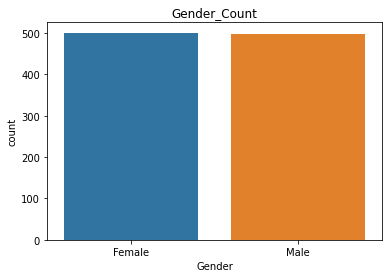

In [ ]:
genderCount  = sns.countplot(x="Gender", data =df_root).set_title("Gender_Count")

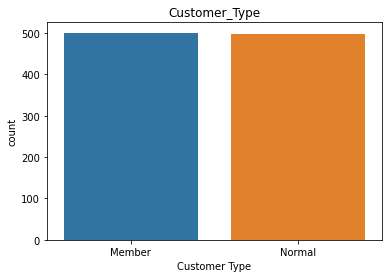

In [ ]:
custType  = sns.countplot(x="Customer Type", data =df_root).set_title("Customer_Type")

This data looks suspicious and does not give any informative insights so we will move to bi-variate and multi-variate analysis

SCATTER PLOT

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

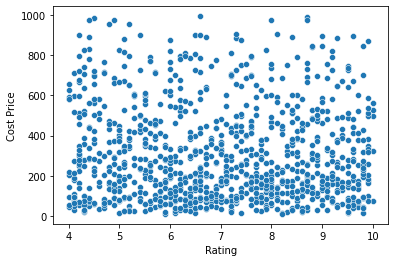

In [ ]:
sns.scatterplot(x='Rating', y= 'Cost Price', data=df_root)

BAR PLOT

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

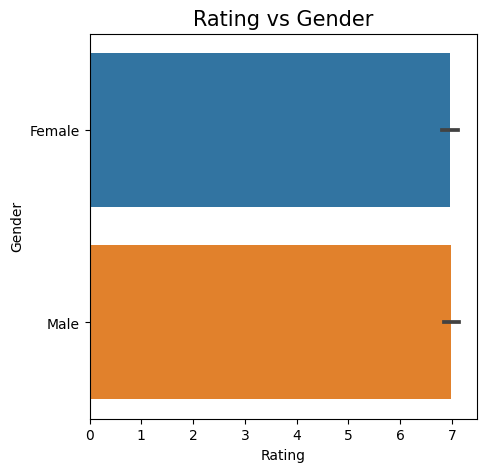

In [ ]:

plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=df_root[0:1000])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

BOX PLOT

A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

Text(0.5, 1.0, 'Ratings by Branch')

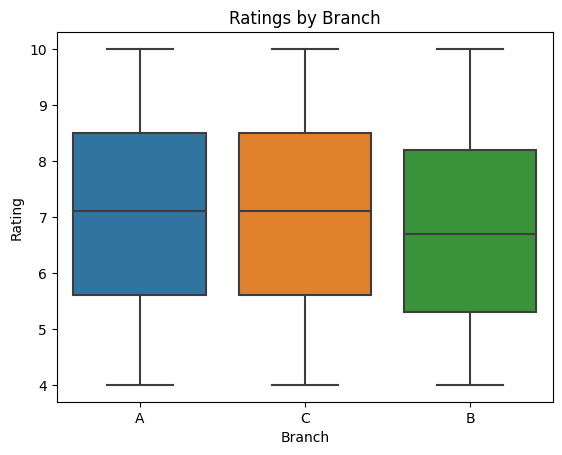

In [ ]:
 sns.boxplot(x="Branch", y = "Rating" ,data =df_root).set_title("Ratings by Branch")

Branch B has the lowest rating among all the branches

LINEPLOT

A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

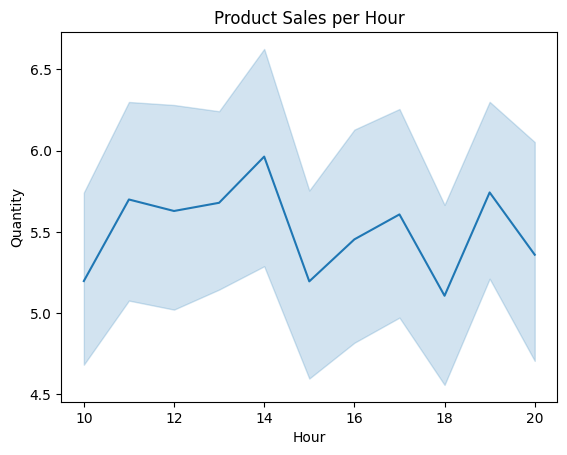

In [ ]:
prodSales  = sns.lineplot(x="Hour",  y = 'Quantity',data =df_root).set_title("Product Sales per Hour")

Sales by the hour in the comapny::  Most of the item were sold around 14:00 hrs local time

Below we can see how each branch's sales quantity looks like by the hour in a monthly fashion

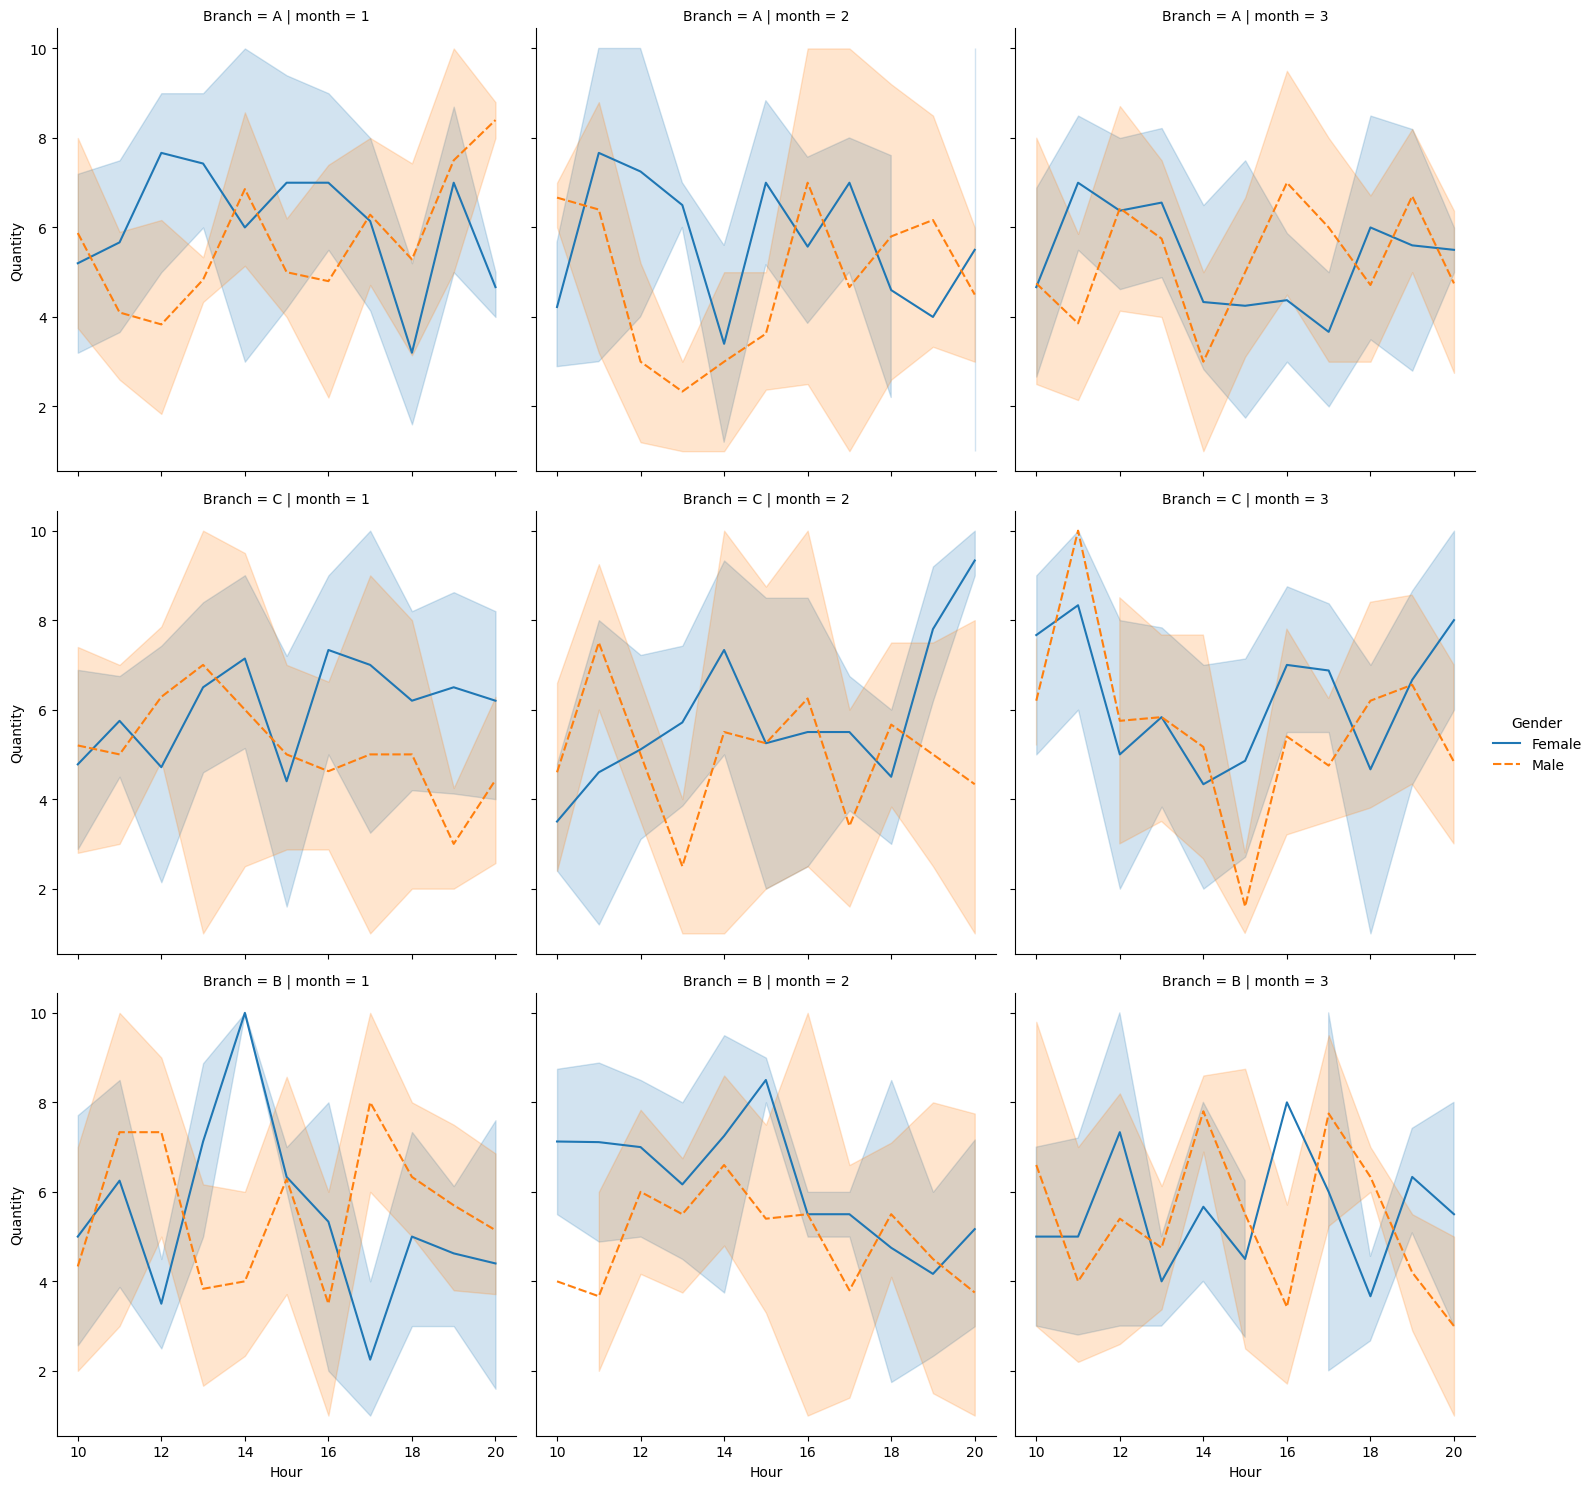

In [ ]:
Sales  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =df_root)

Below we can see each branch's sales by the hour in a monthly fashion

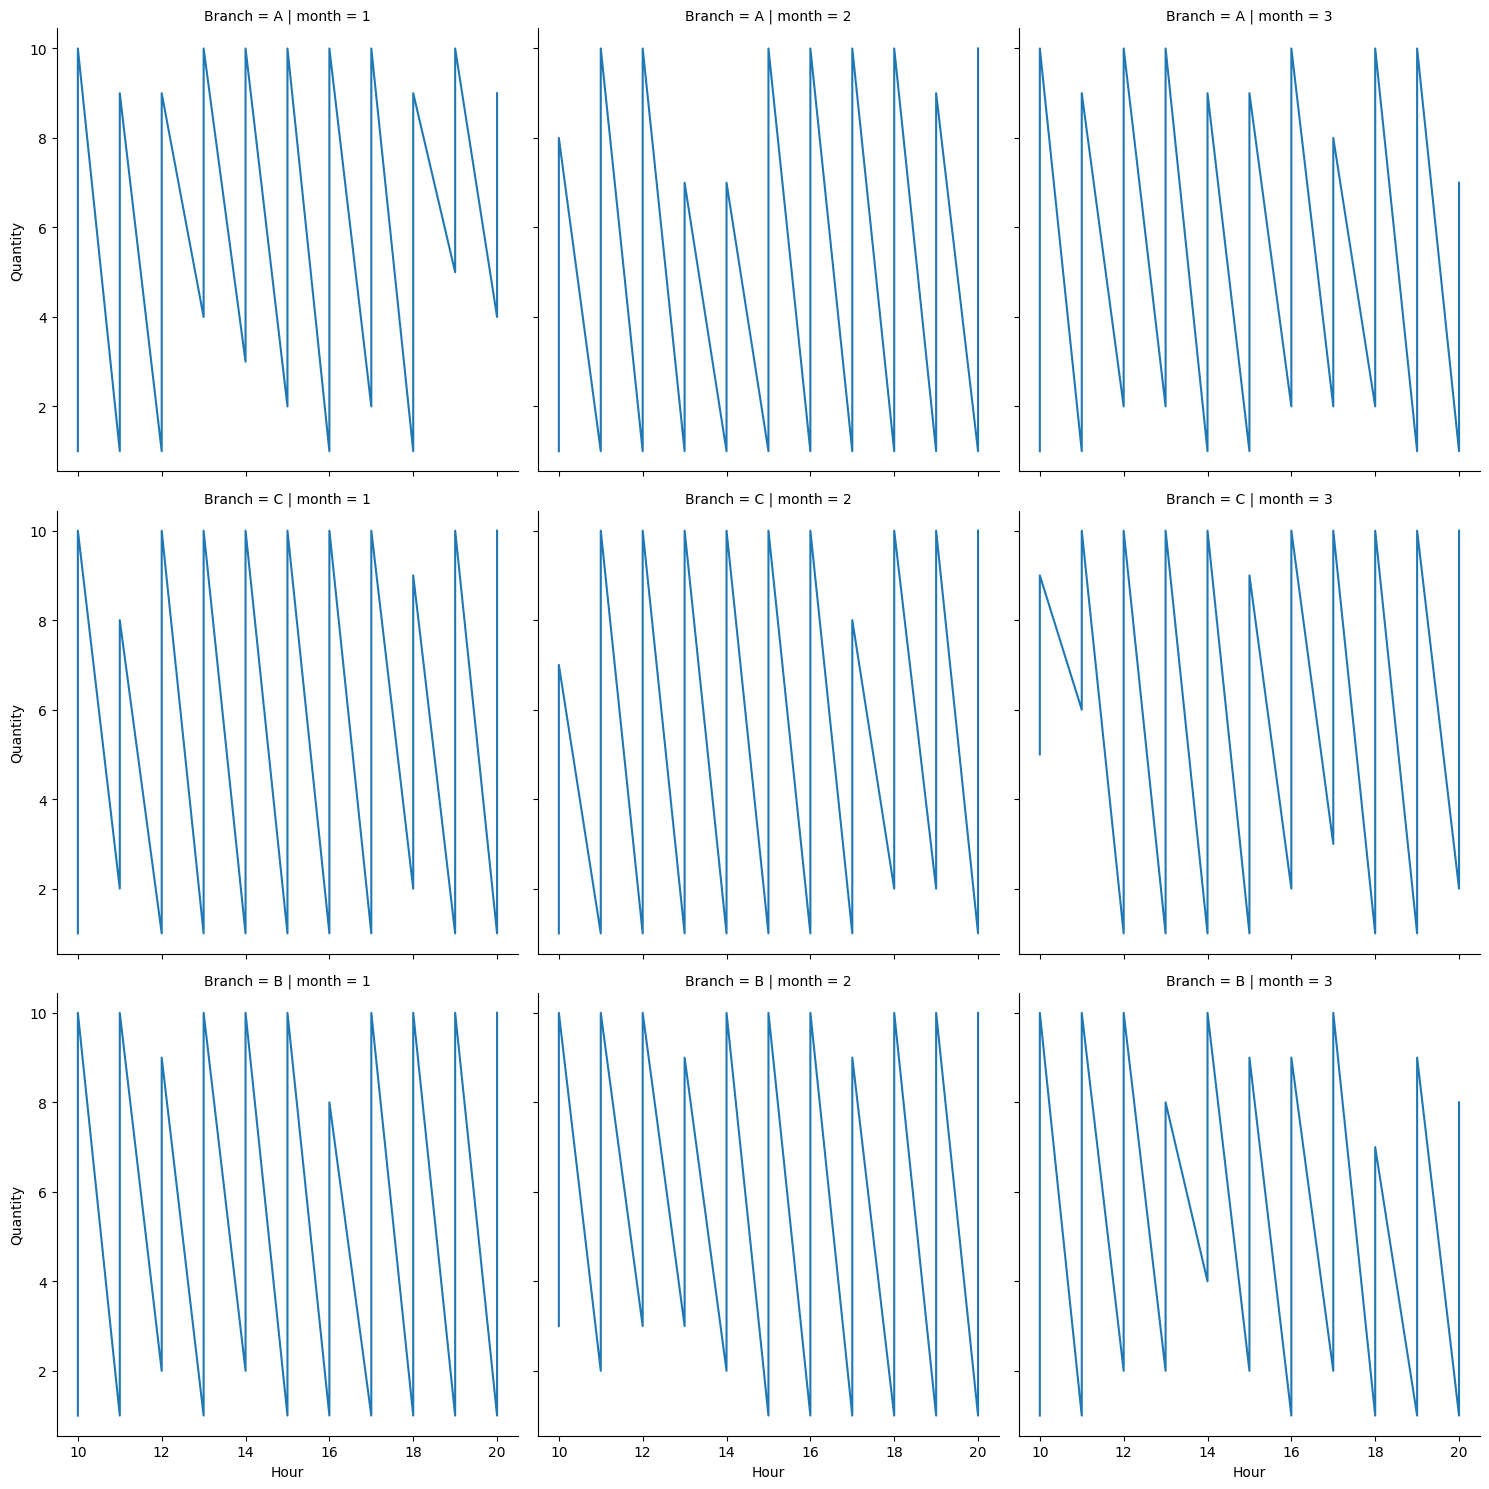

In [ ]:
monthlySales  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', estimator = None, kind="line", data =df_root)

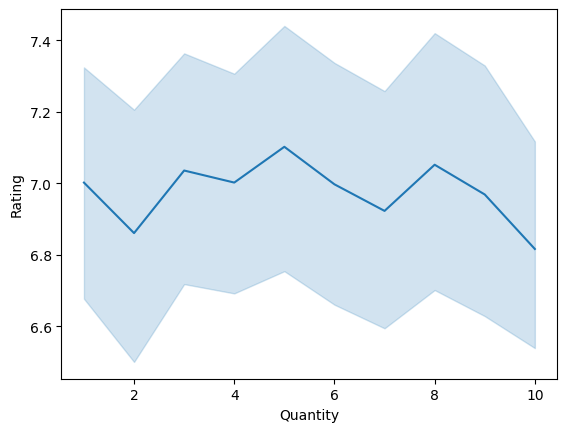

In [ ]:
ageDisSpend = sns.lineplot(x="Quantity", y = "Rating", data =df_root)

#### Analysis by Products

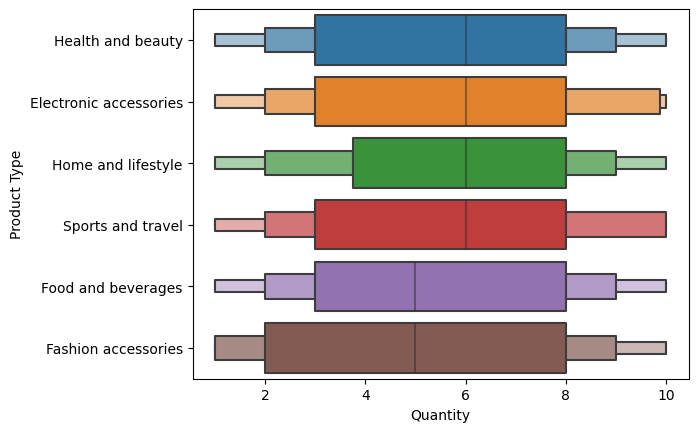

In [ ]:
sns.boxenplot(y = 'Product Type', x = 'Quantity', data=df_root )

From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories.

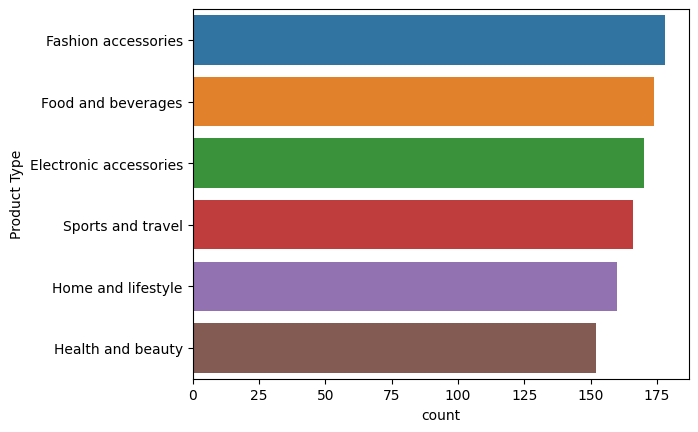

In [ ]:
sns.countplot(y = 'Product Type', data=df_root, order = df_root['Product Type'].value_counts().index )

From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest

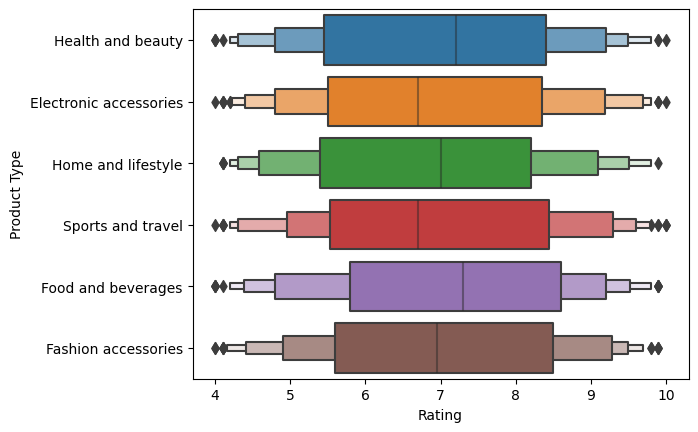

In [ ]:
sns.boxenplot(y = 'Product Type', x = 'Rating', data=df_root )

Food and Beverages have the highest average rating while sports and travel the lowest

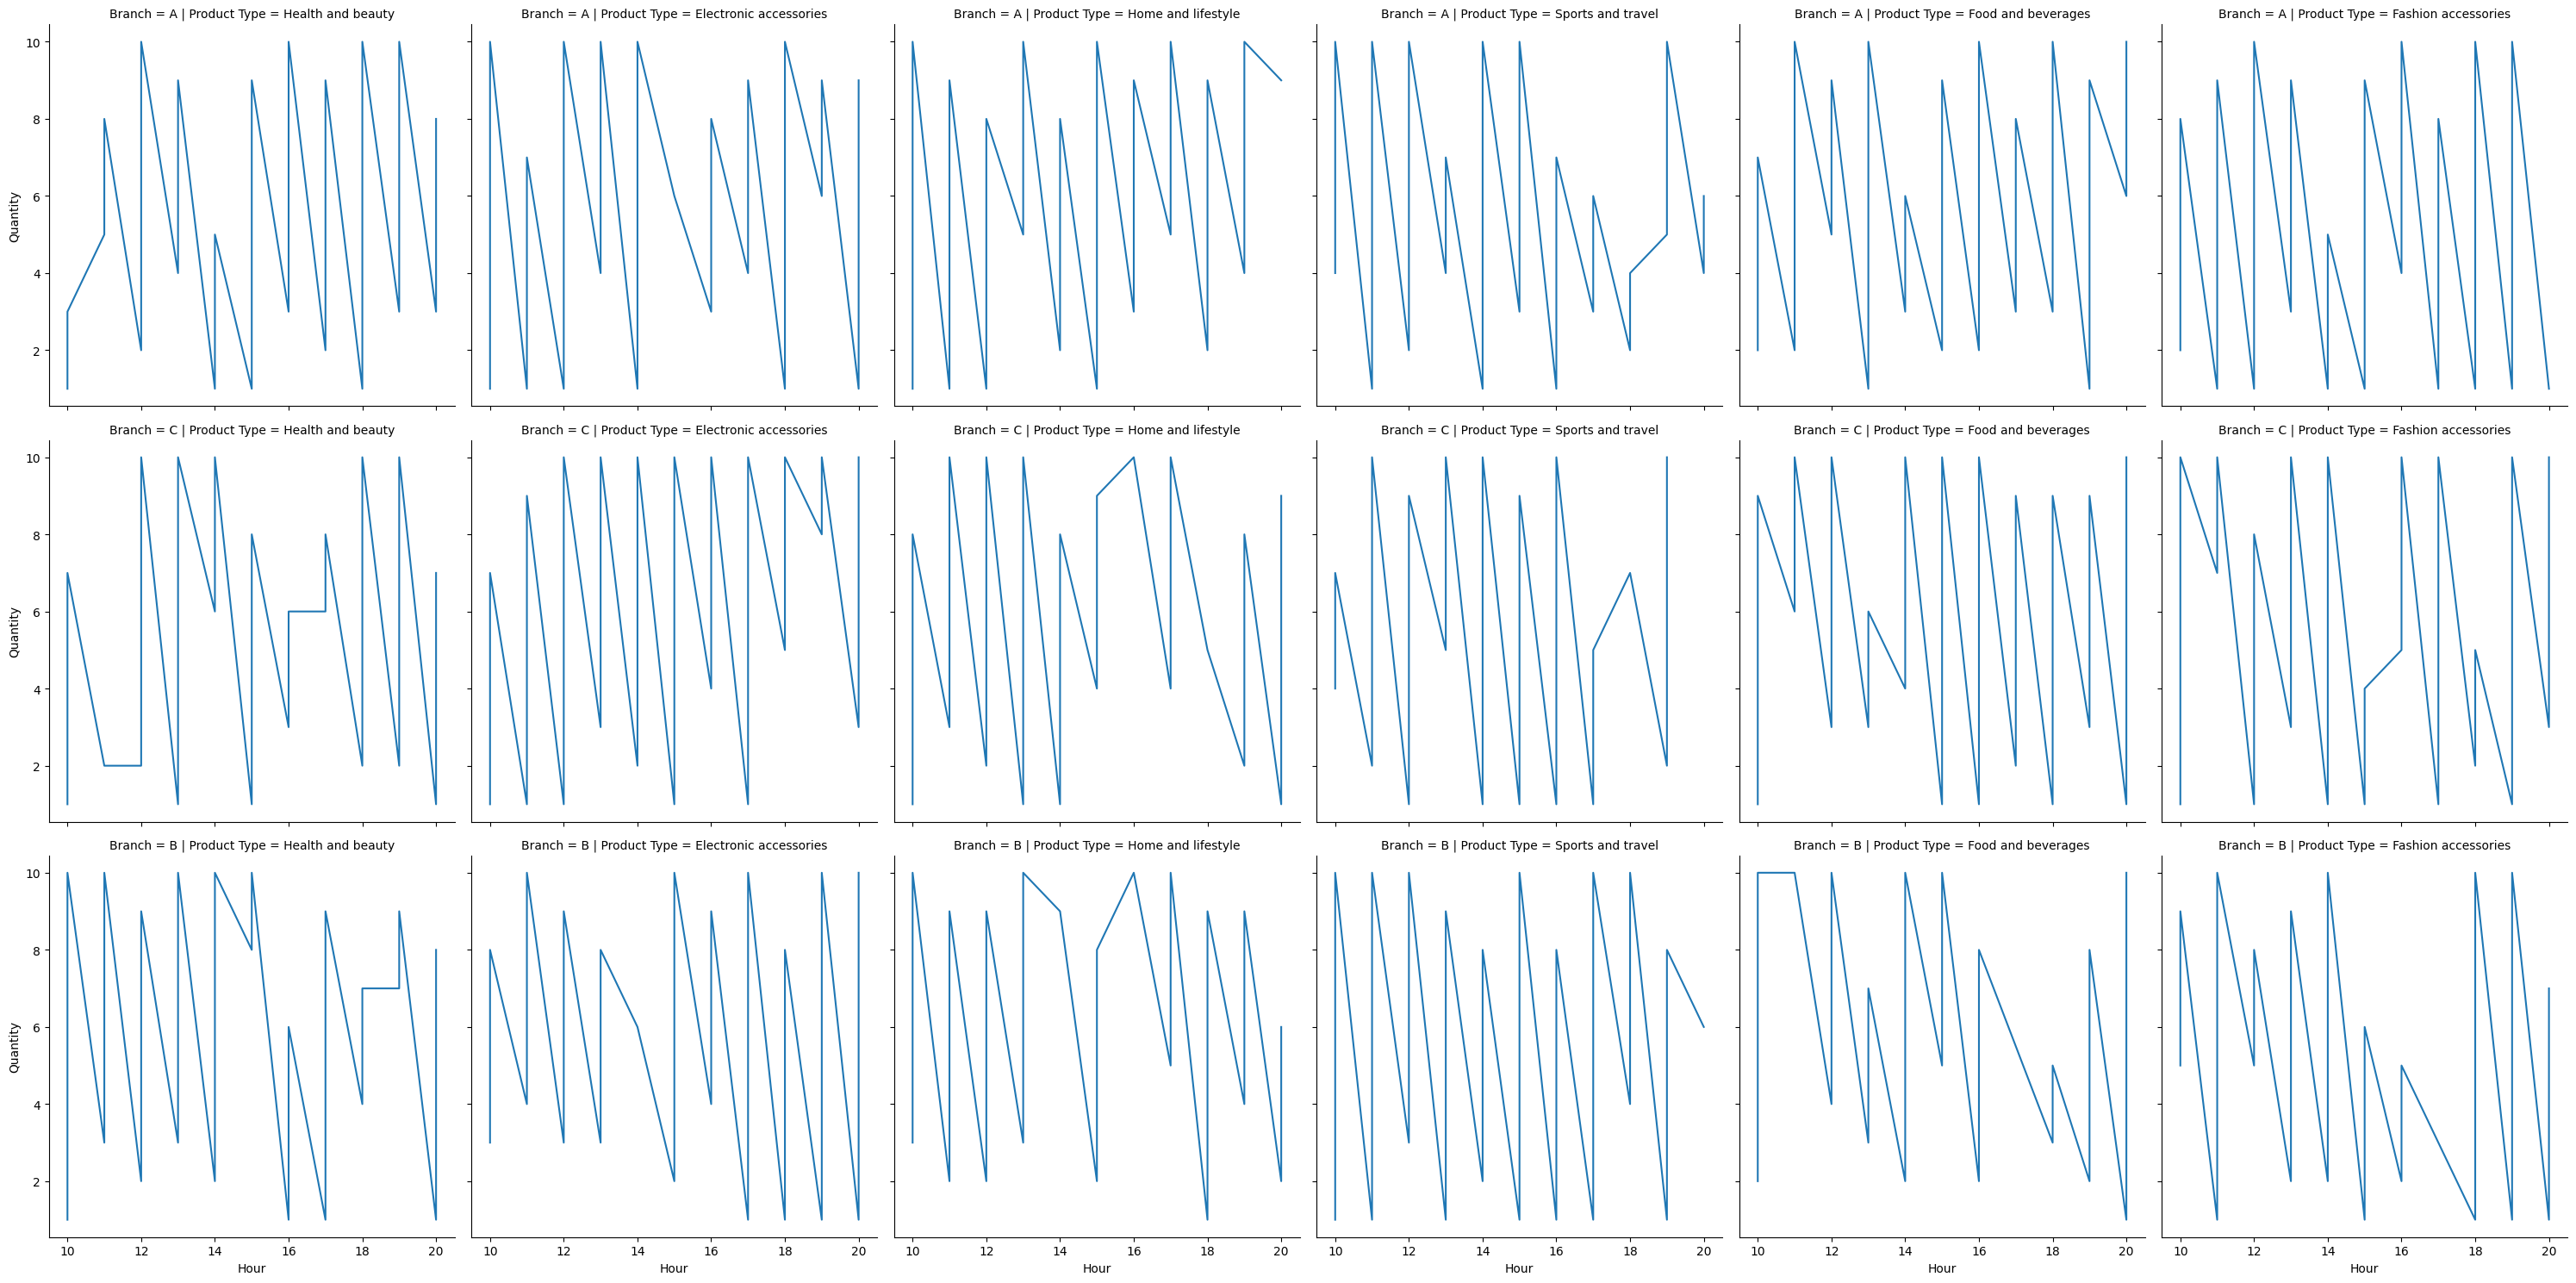

In [ ]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product Type' , row= 'Branch', estimator = None, kind="line", data =df_root)

From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00



#### Analysis by Payment Channel
Let see how customers make payment in this business

Text(0.5, 1.0, 'Payment Channel')

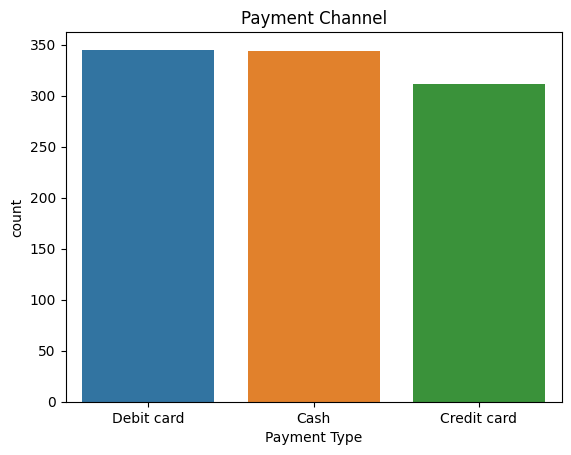

In [ ]:
sns.countplot(x="Payment Type", data =df_root).set_title("Payment Channel") 

Most of the customers pay through the Debt Card and Cash Payment while under 40 percent of them pay with their credit card. We would also like to see this payment type distribution across all the branches

Text(0.5, 1.0, 'Payment Channel by Branch')

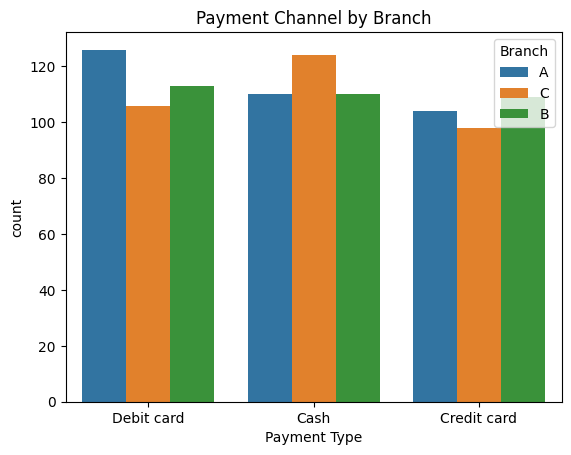

In [ ]:
sns.countplot(x="Payment Type", hue = "Branch", data =df_root).set_title("Payment Channel by Branch") 

#### Customer Analysis
From inspection, there are two types of customers. Members and Normal. 

Text(0.5, 1.0, 'Customer Type by Branch')

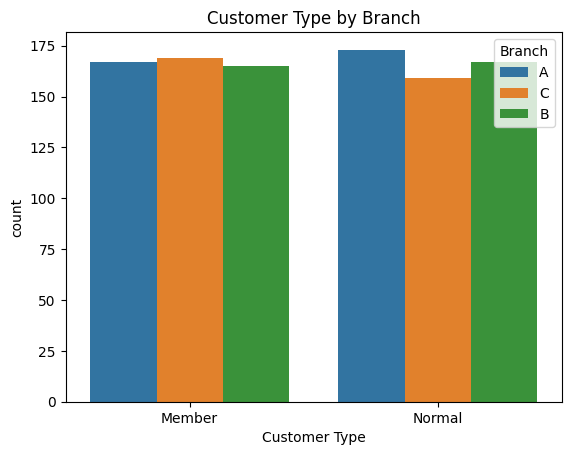

In [ ]:
sns.countplot(x="Customer Type", hue = "Branch", data =df_root).set_title("Customer Type by Branch") 

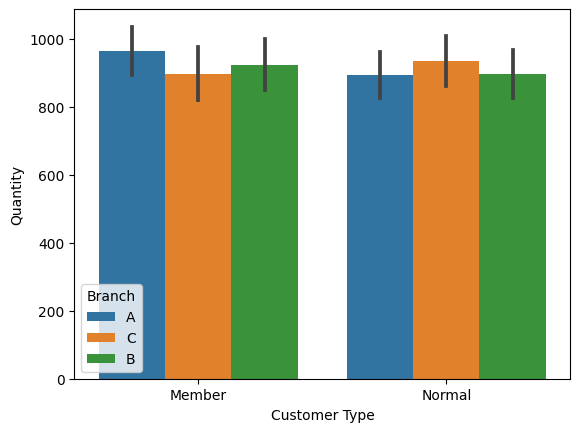

In [ ]:
# Customer Type's Influence on Sales
sns.barplot(x="Customer Type", y="Quantity", hue = "Branch", estimator = sum, data=df_root)

In Branch A and B, member customers shop more where as at branch B, normal customers shop more

#### OverAll Data Analysis

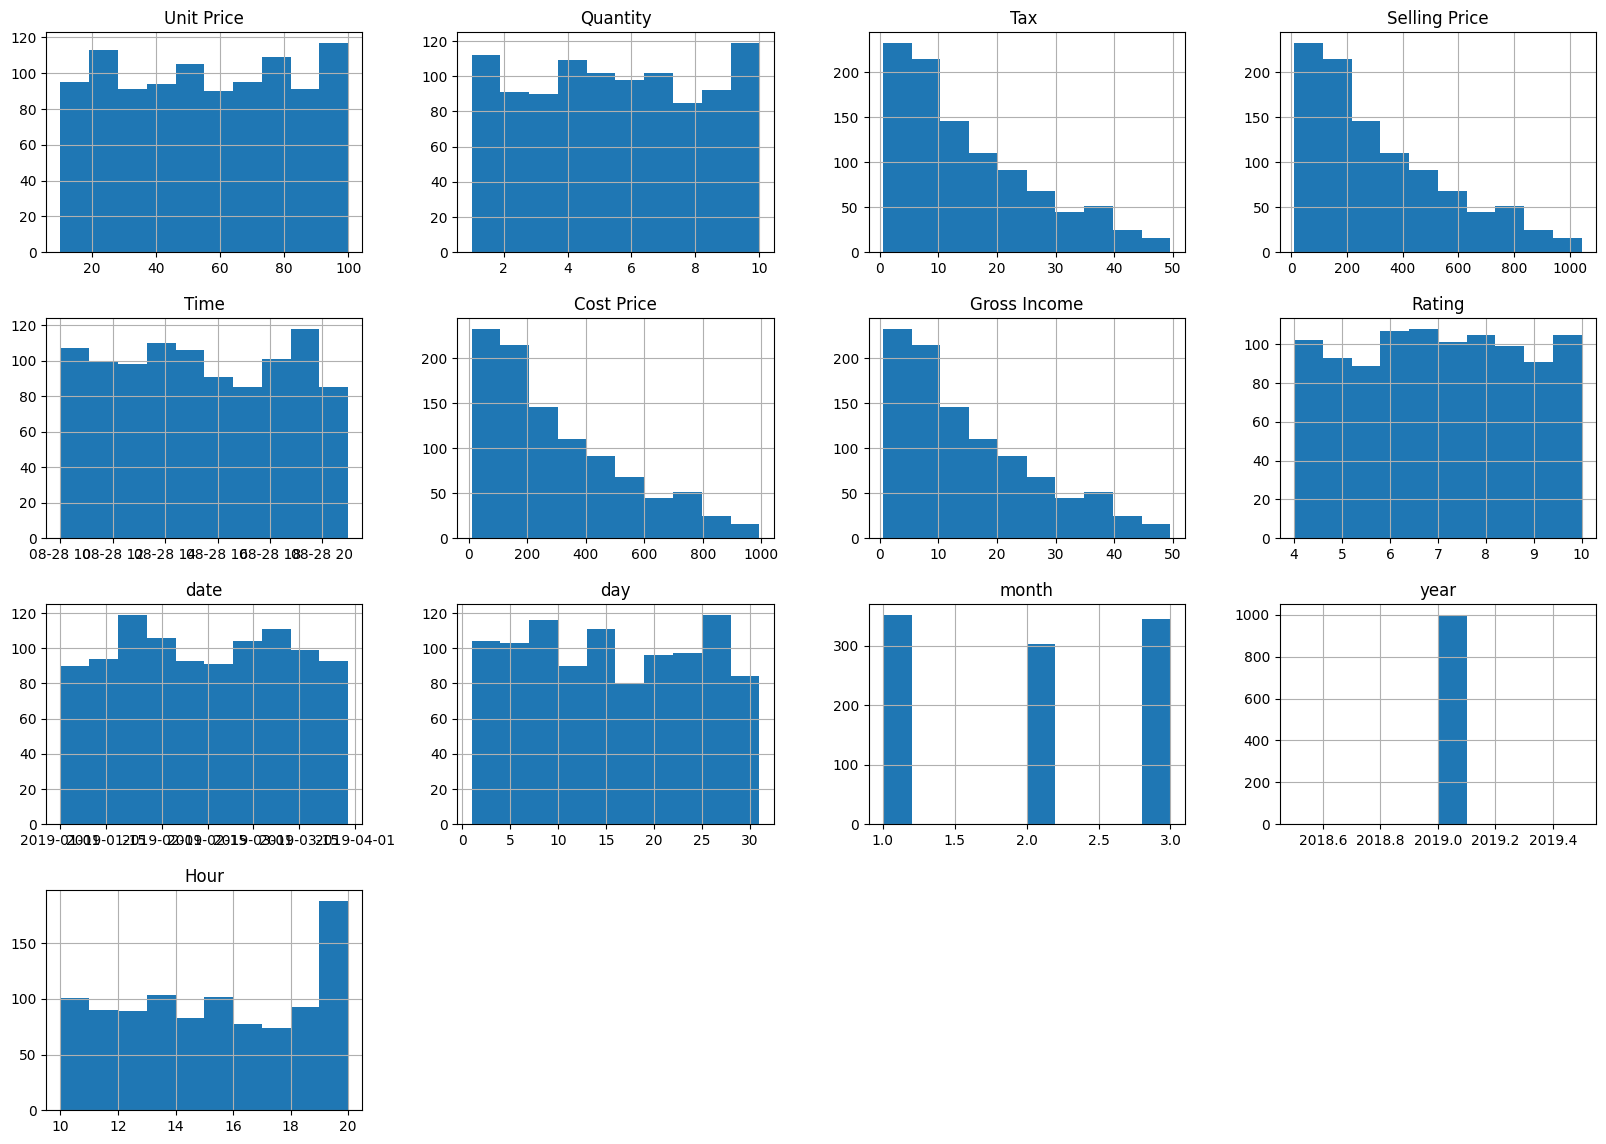

In [ ]:
df_root.hist(figsize=(20,14))
plt.show()

PAIRPLOT

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

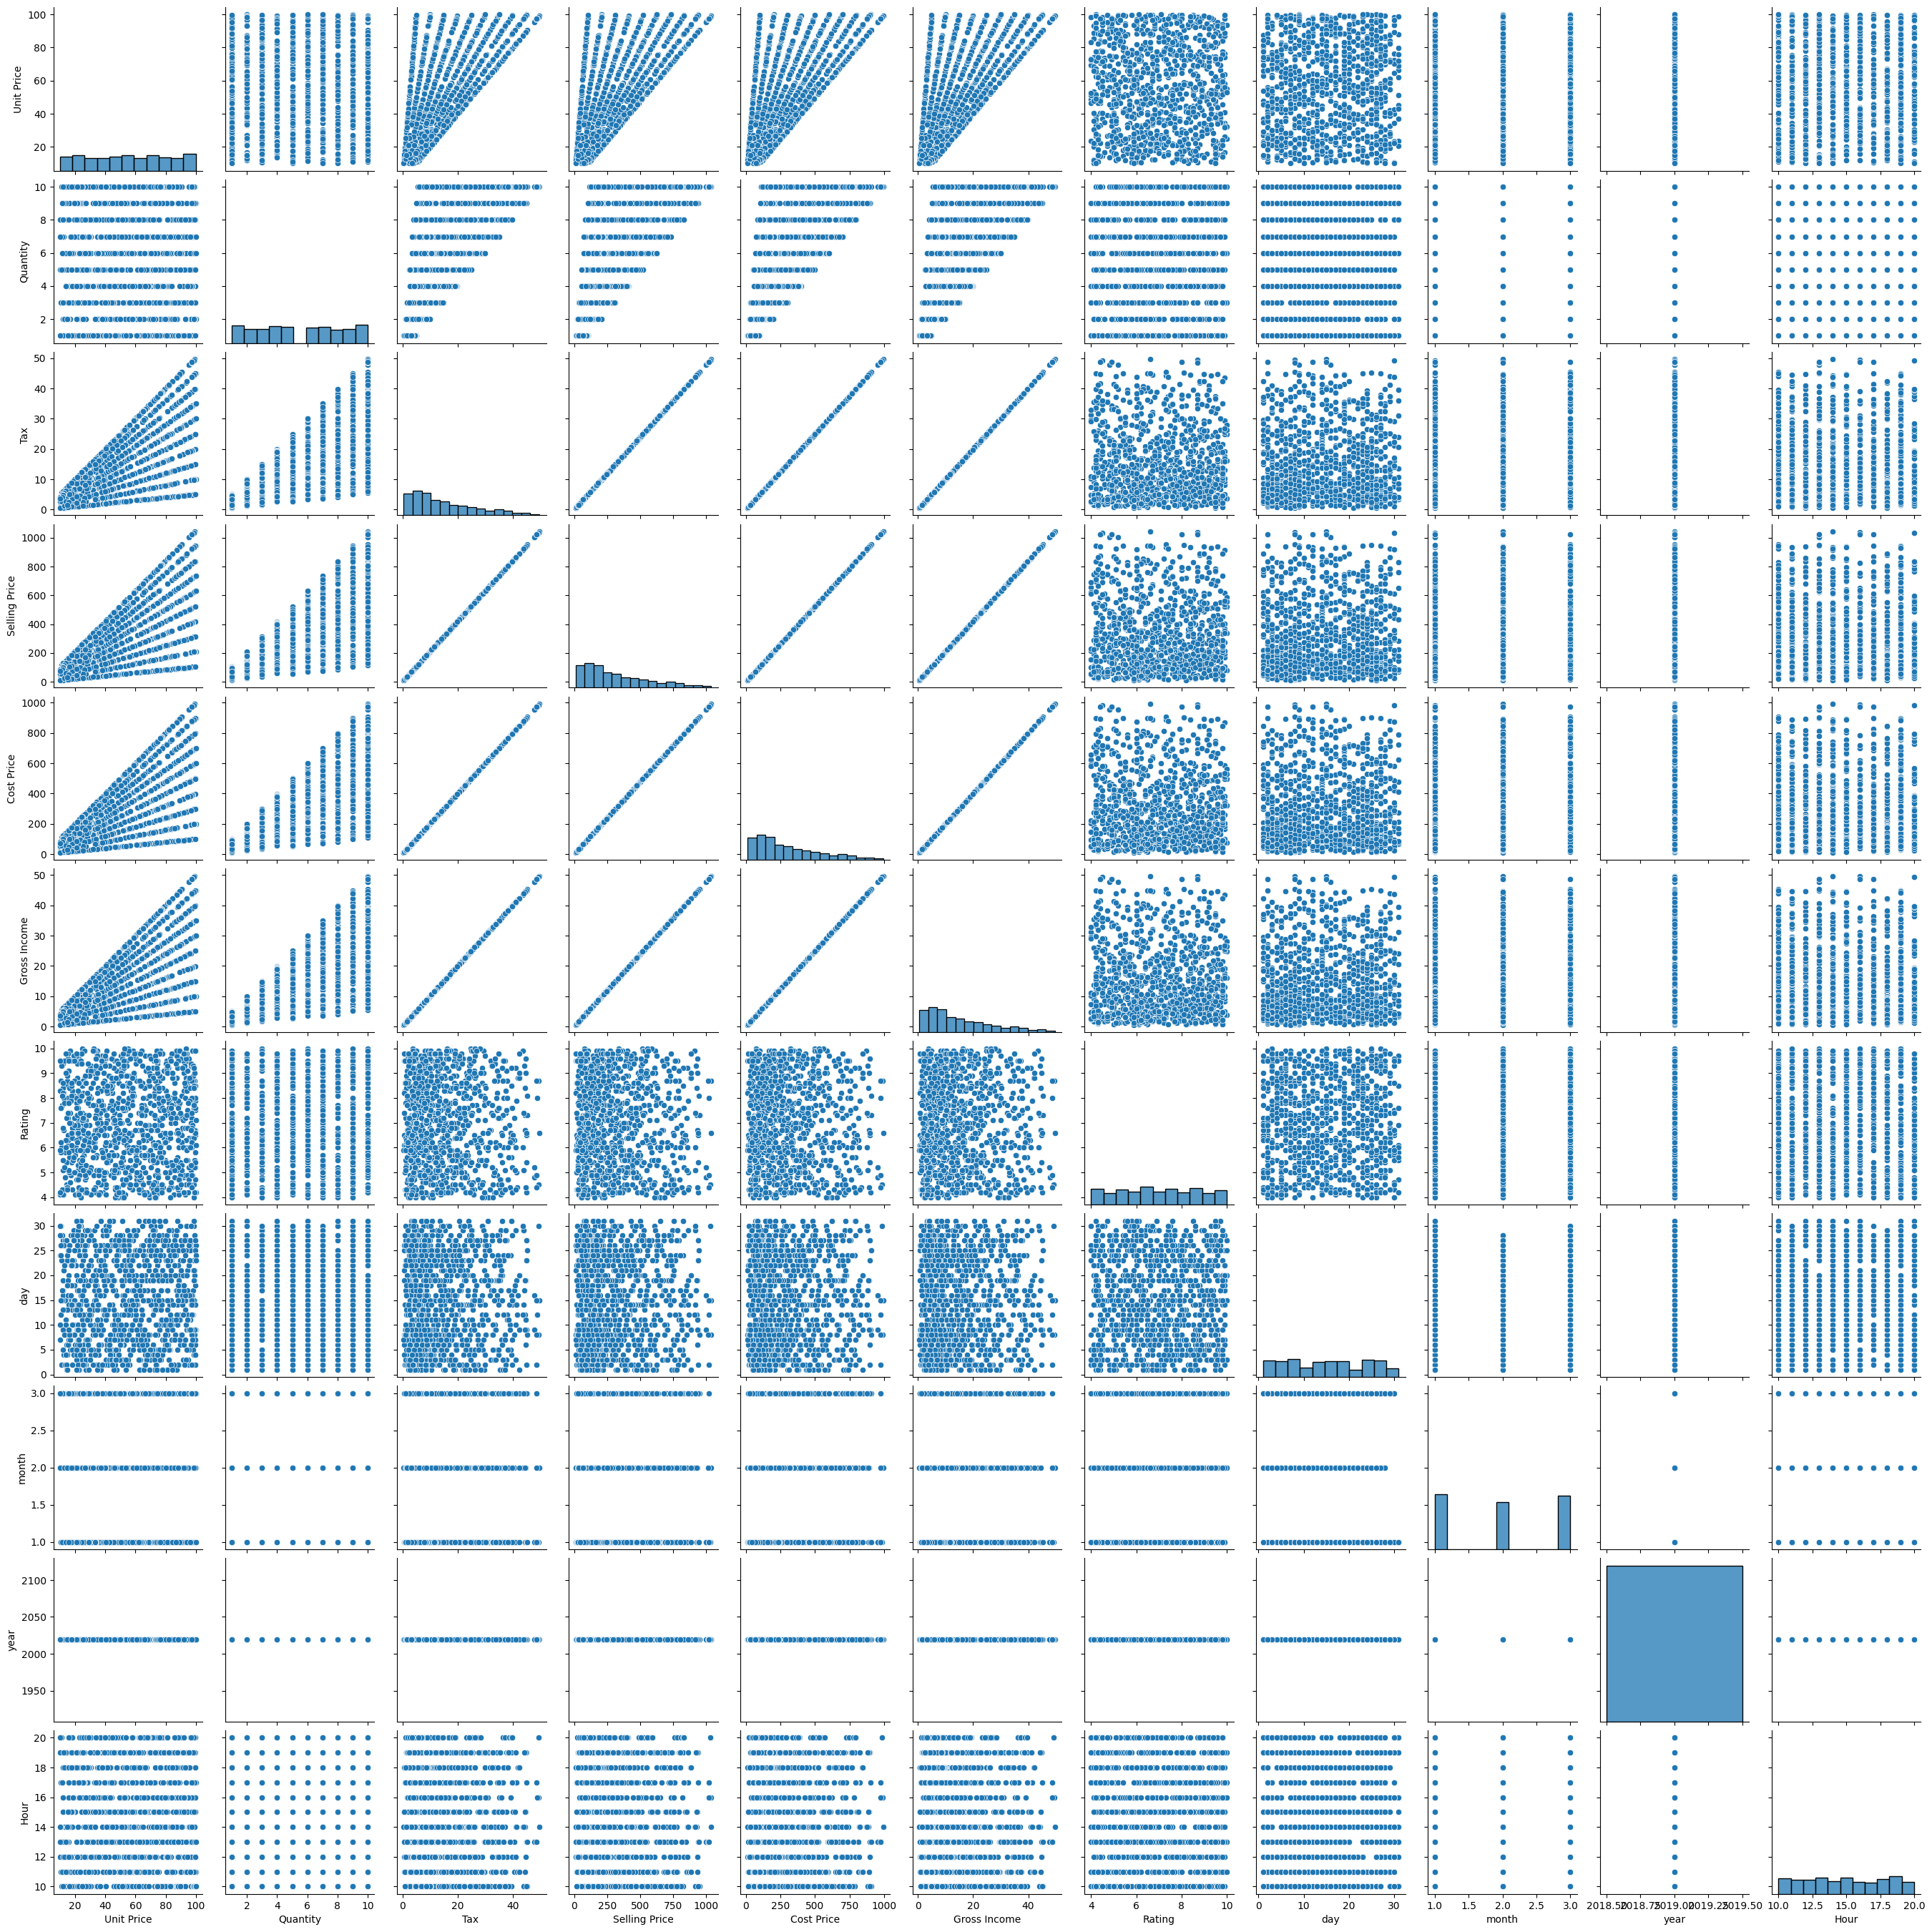

In [ ]:
sns.pairplot(data=df_root)

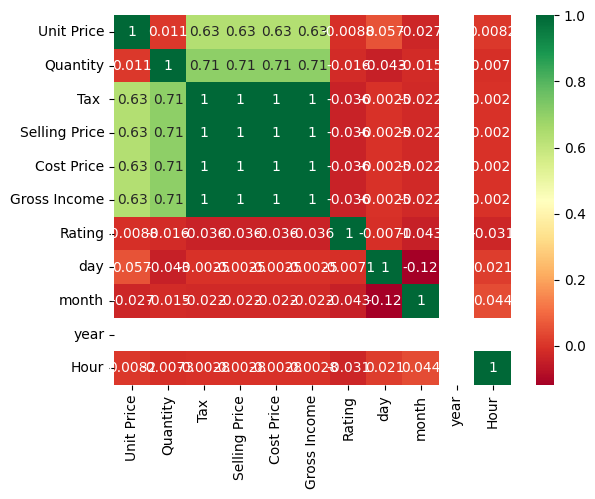

In [ ]:
sns.heatmap(df_root.corr(),annot=True,cmap="RdYlGn")

## Data Wrangling

##### Discrete and Continuous Variables

In [ ]:
numerical_features = [feature for feature in df_root.columns if df_root[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(df_root[feature].unique())<30 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [ ]:
continuos_features=[feature for feature in numerical_features if feature not in discrete_feature ]
print("Discrete Variables Count: {}".format(len(continuos_features)))

Discrete Variables Count: 9


In [ ]:
continuos_features

['Unit Price',
 'Tax ',
 'Selling Price',
 'Time',
 'Cost Price',
 'Gross Income',
 'Rating',
 'date',
 'day']

In [ ]:
values = []
for f in discrete_feature:

    values.append(list(df_root[f].unique()))

In [ ]:
dicrete_df = pd.DataFrame({"Discrete Features":pd.Series(discrete_feature),
                         "Values" : pd.Series(values)})
dicrete_df

Discrete Features                                        Values
0          Quantity               [7, 5, 8, 6, 10, 2, 3, 4, 1, 9]
1             month                                     [1, 3, 2]
2              year                                        [2019]
3              Hour  [13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12]

In [ ]:
df_root.duplicated().sum()

0

In [ ]:
continuos_df = df_root[continuos_features]
continuos_df.describe()

Unit Price         Tax   Selling Price  Cost Price  Gross Income  \
count  1000.000000  1000.000000    1000.000000  1000.00000   1000.000000   
mean     55.672130    15.379369     322.966749   307.58738     15.379369   
std      26.494628    11.708825     245.885335   234.17651     11.708825   
min      10.080000     0.508500      10.678500    10.17000      0.508500   
25%      32.875000     5.924875     124.422375   118.49750      5.924875   
50%      55.230000    12.088000     253.848000   241.76000     12.088000   
75%      77.935000    22.445250     471.350250   448.90500     22.445250   
max      99.960000    49.650000    1042.650000   993.00000     49.650000   

           Rating          day  
count  1000.00000  1000.000000  
mean      6.97270    15.256000  
std       1.71858     8.693563  
min       4.00000     1.000000  
25%       5.50000     8.000000  
50%       7.00000    15.000000  
75%       8.50000    23.000000  
max      10.00000    31.000000

##### Checking for Missing Values

In [ ]:
features_with_na = [features for features in df_root.columns if df_root[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df_root[feature].isnull().mean(), 4),  ' % missing values')
    
features_with_na

[]

There are no rows with Null values.

#### Check Distribution of Features

The distribution provides a parameterized mathematical function that can be used to calculate the probability for any individual observation from the sample space. This distribution describes the grouping or the density of the observations, called the probability density function. We can also calculate the likelihood of an observation having a value equal to or lesser than a given value. A summary of these relationships between observations is called a cumulative density function.

Index(['Invoice ID', 'Branch', 'City', 'Customer Type', 'Gender',
       'Product Type', 'Unit Price', 'Quantity', 'Tax ', 'Selling Price',
       'Date', 'Time', 'Payment Type', 'Cost Price', 'Gross Income', 'Rating',
       'date', 'day', 'month', 'year', 'Hour'],
      dtype='object')


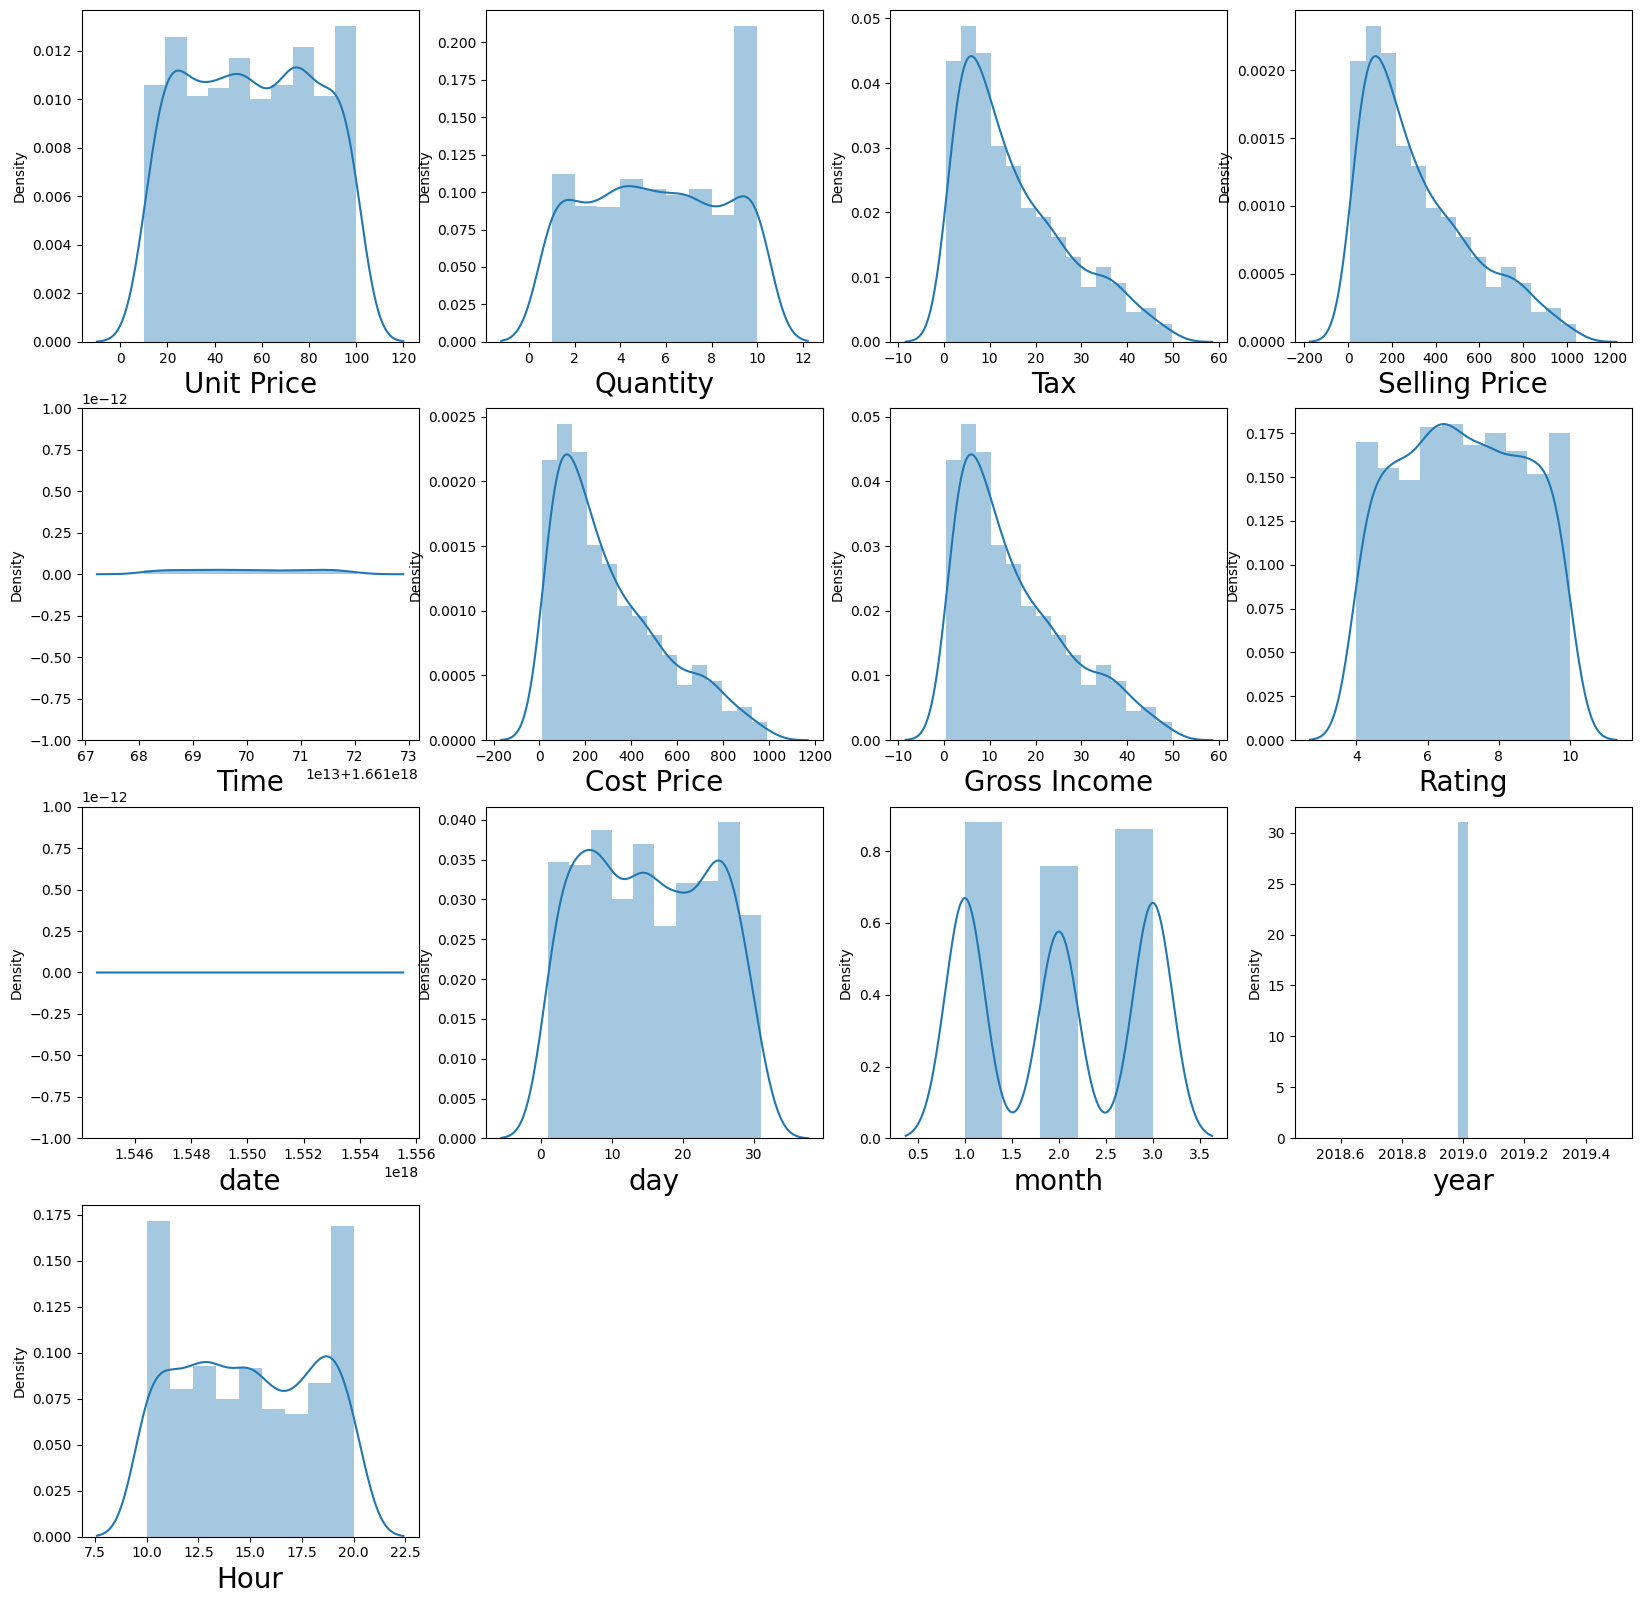

In [ ]:
# let's see how data is distributed for every column
df_tmp = df_root.copy()
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
print(df_tmp.columns)
for column in numerical_features:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_tmp[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Most of the columns are normally distributed but some have skewness due to Outliers

In [ ]:
print("skewness of each column")
for col in numerical_features:
    if(col.lower() not in ("time","date","day","month","year","hour")):
        print(col,"->",df_root[col].skew())

skewness of each column
Unit Price -> 0.007077447853328846
Quantity -> 0.012941048017172435
Tax  -> 0.8925698049581423
Selling Price -> 0.8925698049581418
Cost Price -> 0.8925698049581418
Gross Income -> 0.8925698049581423
Rating -> 0.00900964876573073


#### Outlier Handling
Outliers are those data points which differs significantly from other observations present in given dataset. It can occur because of variability in measurement and due to misinterpretation in filling data points.

In [ ]:
df_outlier = df_root[numerical_features]
df_outlier = df_outlier.drop(columns = ["date","Time"])
df_outlier.head()

Unit Price  Quantity     Tax   Selling Price  Cost Price  Gross Income  \
0       74.69         7  26.1415       548.9715      522.83       26.1415   
1       15.28         5   3.8200        80.2200       76.40        3.8200   
2       46.33         7  16.2155       340.5255      324.31       16.2155   
3       58.22         8  23.2880       489.0480      465.76       23.2880   
4       86.31         7  30.2085       634.3785      604.17       30.2085   

   Rating  day  month  year  Hour  
0     9.1    5      1  2019    13  
1     9.6    8      3  2019    10  
2     7.4    3      3  2019    13  
3     8.4   27      1  2019    20  
4     5.3    8      2  2019    10

Checking for outliers

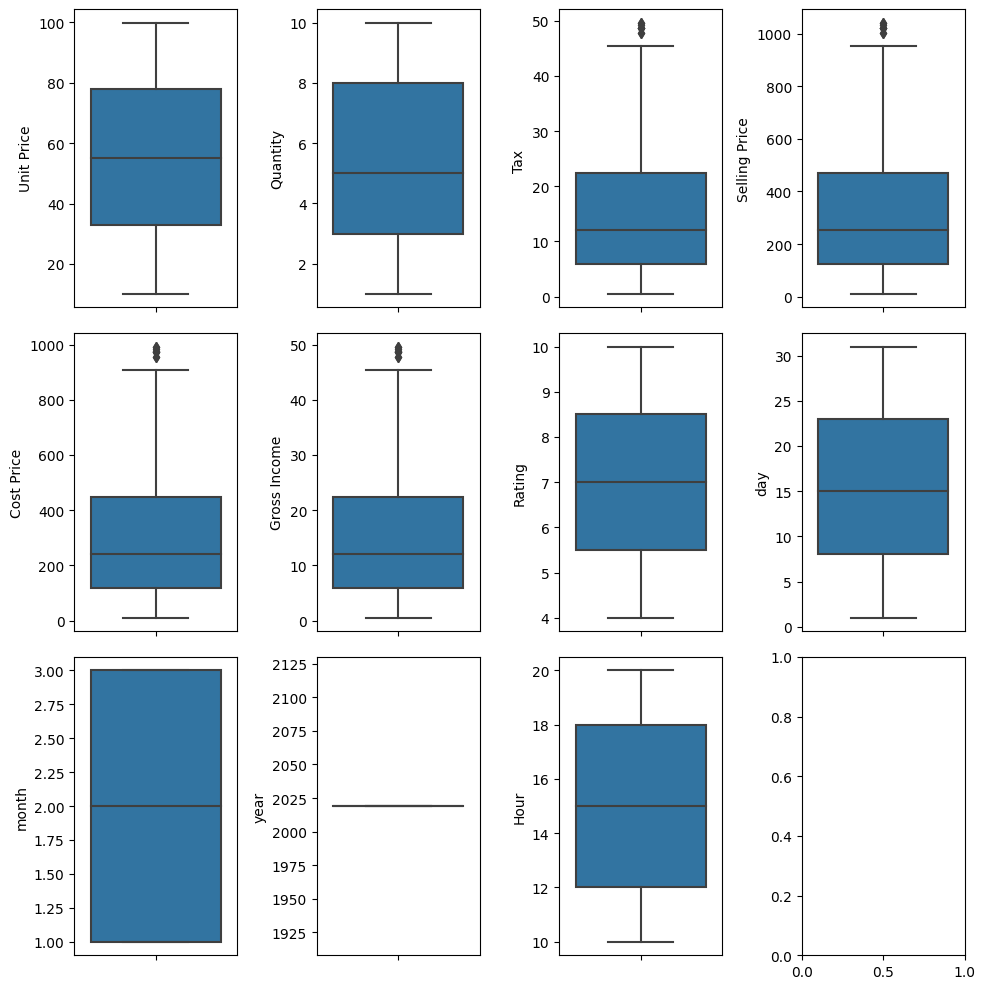

In [ ]:
# Show BoxPlot for all features before outlier handling
Numeric_cols = df_outlier.columns

fig, ax = plt.subplots(3,4, figsize=(10, 10))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y = df_outlier[variable], ax=subplot)
plt.tight_layout()

In [ ]:
print("skewness of each column after Outlier Handling")
for column in df_outlier.columns:
    Q1= np.percentile(df_outlier[column], 25,interpolation = 'midpoint')
    Q3 = np.percentile(df_outlier[column], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    median = df_outlier[column].quantile(0.50)
    df_outlier[column] = np.where(df_outlier[column] <=(Q1-1.5*IQR), median,df_outlier[column])
    df_outlier[column] = np.where(df_outlier[column] >=(Q3+1.5*IQR), median,df_outlier[column])
    print(column, "->", df_outlier[column].skew())

skewness of each column after Outlier Handling
Unit Price -> 0.007077447853328846
Quantity -> 0.012941048017172435
Tax  -> 0.8539666912649819
Selling Price -> 0.8539666912649819
Cost Price -> 0.8539666912649815
Gross Income -> 0.8539666912649819
Rating -> 0.00900964876573073
day -> 0.04974918301697757
month -> 0.013144153204318845
year -> 0
Hour -> 0.025787149661161485


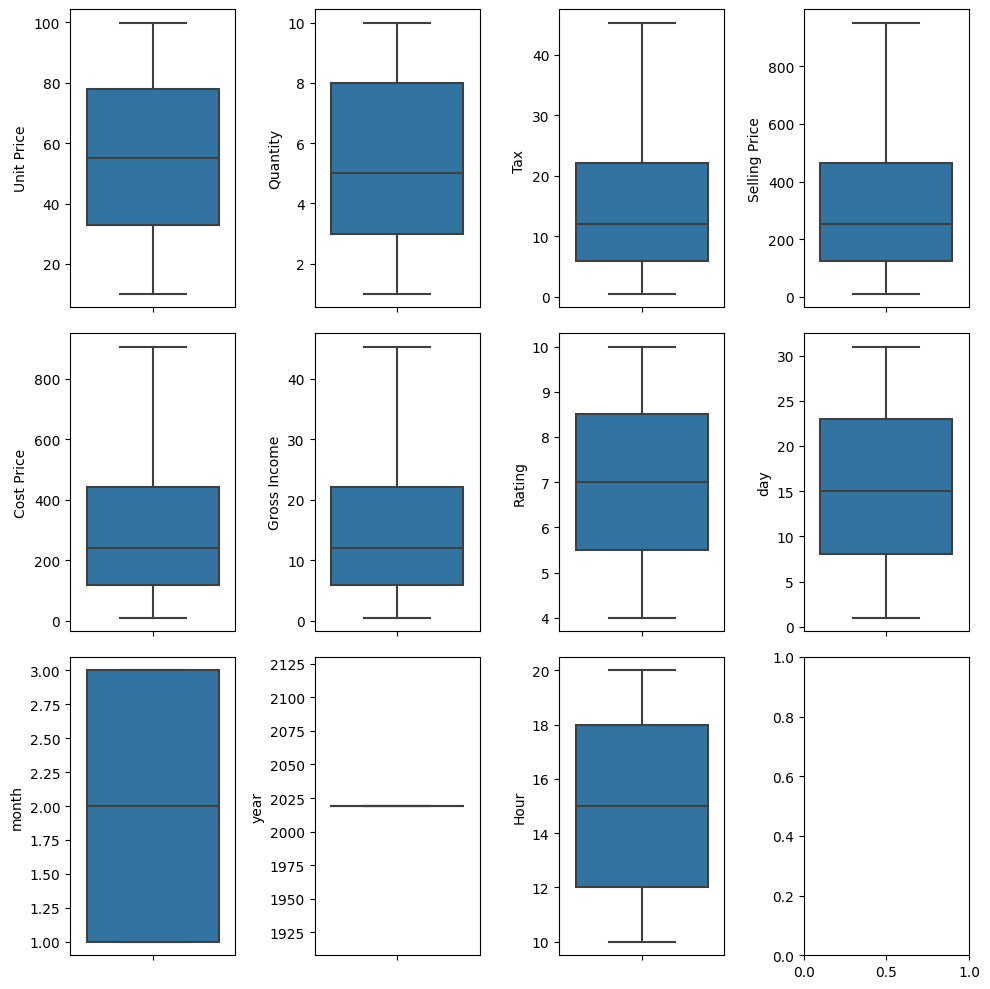

In [ ]:
# Show BoxPlot for all features after outlier handling 

Numeric_cols = df_outlier.columns

fig, ax = plt.subplots(3, 4, figsize=(10, 10))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df_outlier[variable], ax=subplot)
plt.tight_layout()

After Replacing the outliers with Median(robust to Outliers) the data looks good and outliers are lose of the boundaries which can be considered for building the data<br>
Also the distribution of the data is also not skewed after removal of outliers


#### Standardization and Normalization of Features

Feature scaling is one of the most important data preprocessing step in machine learning. Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled.

<b>Normalization or Min-Max Scaling</b> :  is used to transform features to be on a similar scale. The new point is calculated as:

<b>Standardization or Z-Score Normalization</b> :  is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.

X_new = (X - mean)/Std
<br>
Standardization can be helpful in cases where the data follows a Gaussian distribution
<br><br>
Data is normally Distributed so just applying Standard Scaling is enough

#### Check Distributions

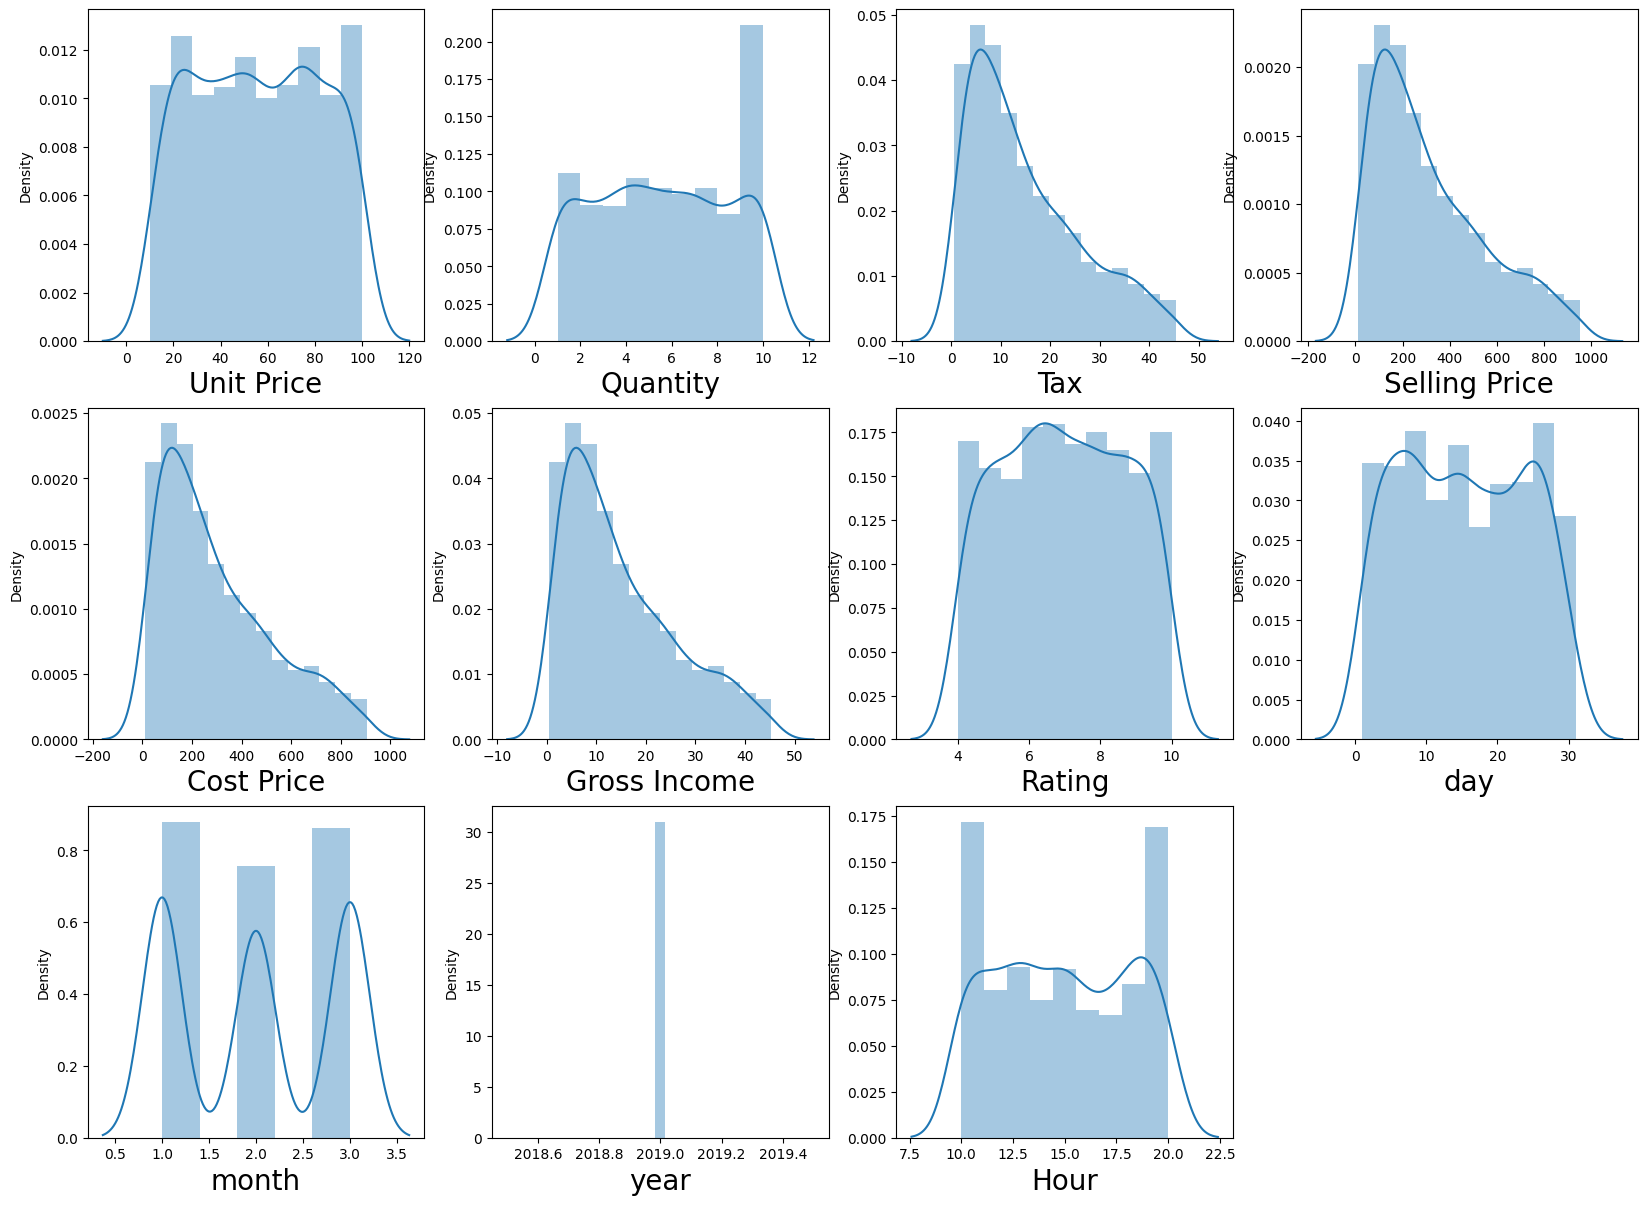

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df_outlier.columns:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_outlier[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

'Selling Price', 'Cost Price', 'Gross Income','Tax ' columns are right skewed, so apply Log transformation before standardization 

#### Log Transformation

In [ ]:
log_list = ['Selling Price', 'Cost Price', 'Gross Income','Tax ']
df_outlier[['Selling Price', 'Cost Price', 'Gross Income','Tax ']].head()

Selling Price  Cost Price  Gross Income     Tax 
0       548.9715      522.83       26.1415  26.1415
1        80.2200       76.40        3.8200   3.8200
2       340.5255      324.31       16.2155  16.2155
3       489.0480      465.76       23.2880  23.2880
4       634.3785      604.17       30.2085  30.2085

In [ ]:
df_log_trans = np.log(df_outlier[log_list])
df_log_trans.head()

Selling Price  Cost Price  Gross Income      Tax 
0       6.308047    6.259256      3.263524  3.263524
1       4.384773    4.335983      1.340250  1.340250
2       5.830490    5.781700      2.785968  2.785968
3       6.192461    6.143670      3.147938  3.147938
4       6.452646    6.403856      3.408123  3.408123

In [ ]:
# Concatination of new Columns to the datatable  before standardizartion

tmp = df_outlier.drop(columns=log_list)
df_outlier = pd.concat([ tmp,df_log_trans],axis = 1)

In [ ]:
df_outlier.head()

Unit Price  Quantity  Rating   day  month    year  Hour  Selling Price  \
0       74.69       7.0     9.1   5.0    1.0  2019.0  13.0       6.308047   
1       15.28       5.0     9.6   8.0    3.0  2019.0  10.0       4.384773   
2       46.33       7.0     7.4   3.0    3.0  2019.0  13.0       5.830490   
3       58.22       8.0     8.4  27.0    1.0  2019.0  20.0       6.192461   
4       86.31       7.0     5.3   8.0    2.0  2019.0  10.0       6.452646   

   Cost Price  Gross Income      Tax   
0    6.259256      3.263524  3.263524  
1    4.335983      1.340250  1.340250  
2    5.781700      2.785968  2.785968  
3    6.143670      3.147938  3.147938  
4    6.403856      3.408123  3.408123

In [ ]:
df_outlier.drop(columns=["day","month","year","Hour"],inplace=True)

### Scaling

<b>Standard Scaling</b>

In [ ]:
trans = StandardScaler()
data = trans.fit_transform(df_outlier)
df_rootSS = pd.DataFrame(data,columns=df_outlier.columns)

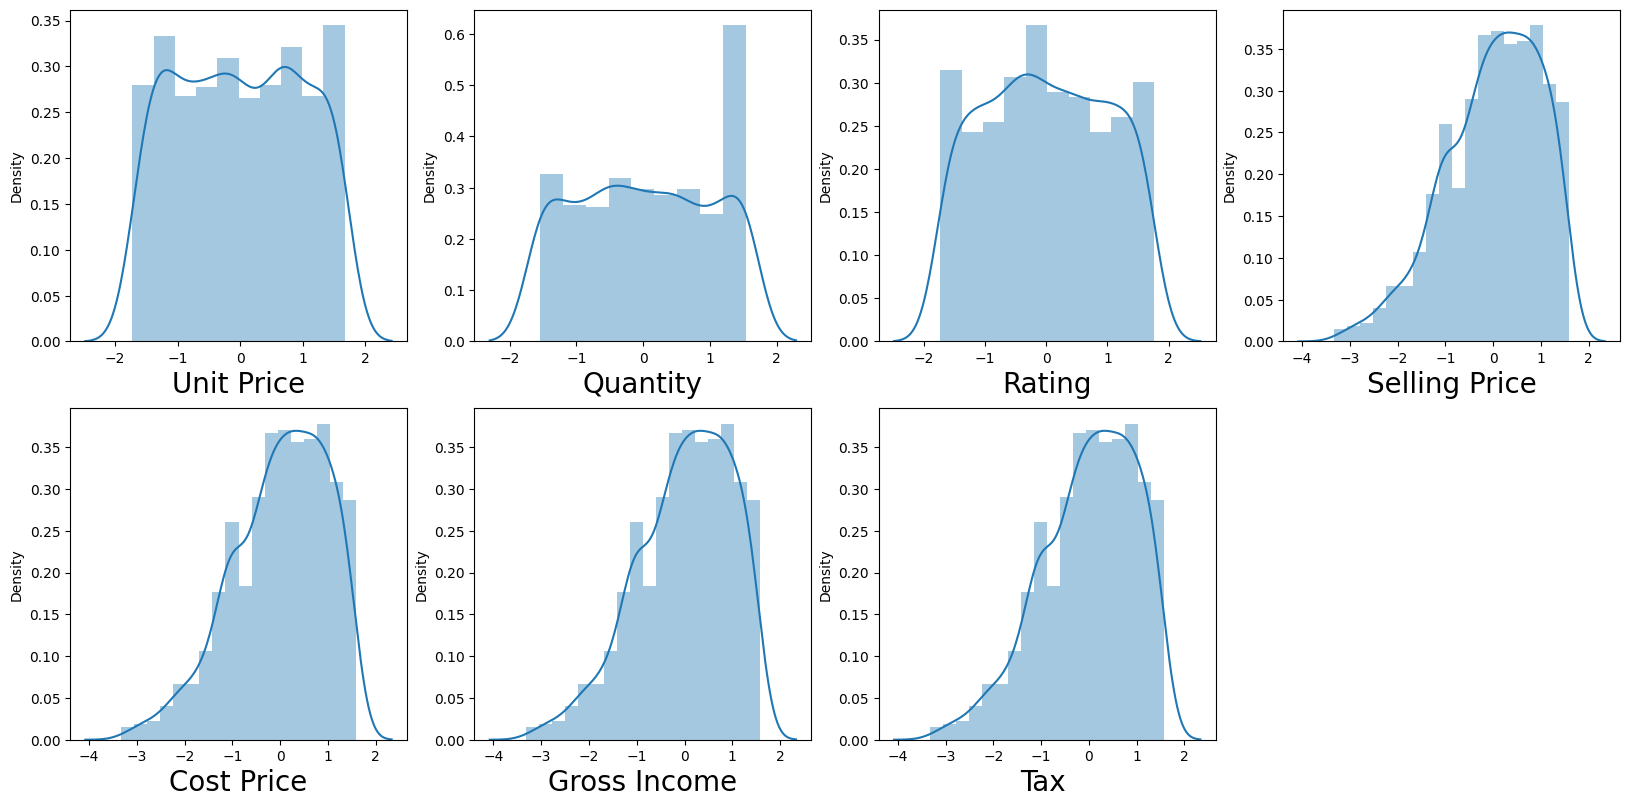

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df_rootSS.columns:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_rootSS[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b>Robust Scaling</b>

In [ ]:
scalar = RobustScaler()
df_rootRB = pd.DataFrame(scalar.fit_transform(df_outlier), columns=df_outlier.columns)

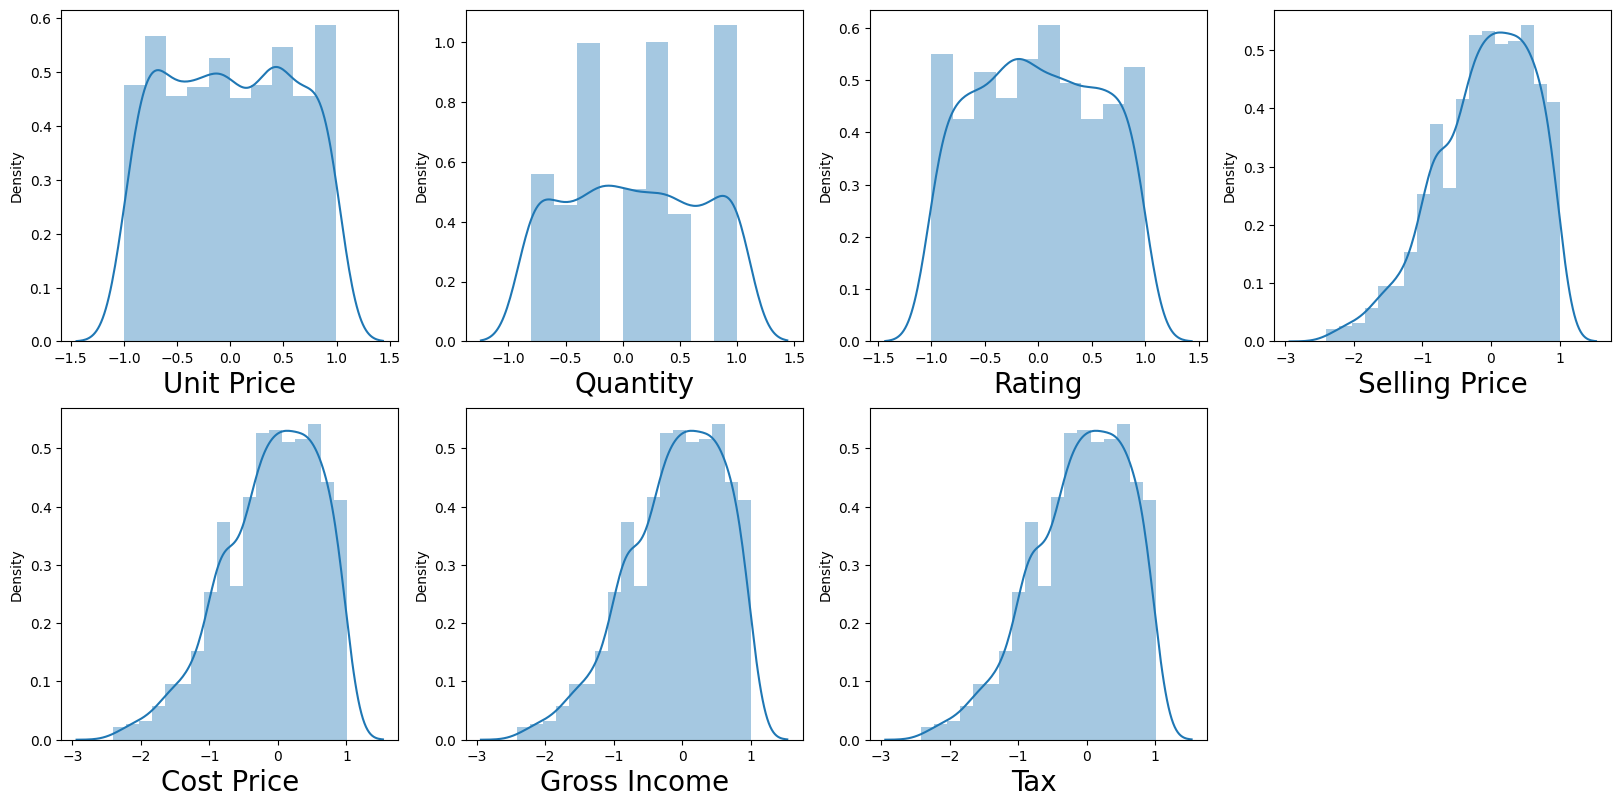

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df_rootRB.columns:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_rootRB[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
dict_skew = {
    "Column" : df_rootSS.skew().index,
    "Normal" : df_outlier.skew().values,
    "Standard Scaling" : df_rootSS.skew().values,
    "Robust Scaling" : df_rootRB.skew().values,
} 
skewness_df = pd.DataFrame(dict_skew)
skewness_df

Column    Normal  Standard Scaling  Robust Scaling
0     Unit Price  0.007077          0.007077        0.007077
1       Quantity  0.012941          0.012941        0.012941
2         Rating  0.009010          0.009010        0.009010
3  Selling Price -0.611662         -0.611662       -0.611662
4     Cost Price -0.611662         -0.611662       -0.611662
5   Gross Income -0.611662         -0.611662       -0.611662
6           Tax  -0.611662         -0.611662       -0.611662

Both Scaling techniques give same result, so we can use any of the scaling techniques
<br> From the Table above we can see that both Transformation give same results and data is Standardized
<br> Scaling is not required as there is no change is Skewness 

## Feature Selection

In [ ]:
df_prime = df_root.copy()

In [ ]:
objList = df_prime.select_dtypes(include = "object").columns       # extracting object data type from dataset
print (objList)  

Index(['Invoice ID', 'Branch', 'City', 'Customer Type', 'Gender',
       'Product Type', 'Date', 'Payment Type'],
      dtype='object')


In [ ]:
le = LabelEncoder()
for features in objList:
    df_prime[features] = le.fit_transform(df_prime[features])
df_prime.info()       #Checking Info after LabelEncoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   int64         
 1   Branch         1000 non-null   int64         
 2   City           1000 non-null   int64         
 3   Customer Type  1000 non-null   int64         
 4   Gender         1000 non-null   int64         
 5   Product Type   1000 non-null   int64         
 6   Unit Price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Tax            1000 non-null   float64       
 9   Selling Price  1000 non-null   float64       
 10  Date           1000 non-null   int64         
 11  Time           1000 non-null   datetime64[ns]
 12  Payment Type   1000 non-null   int64         
 13  Cost Price     1000 non-null   float64       
 14  Gross Income   1000 non-null   float64       
 15  Rating         1000 no

In [ ]:
df_prime.head()

Invoice ID  Branch  City  Customer Type  Gender  Product Type  Unit Price  \
0         814       0     0              0       0             3       74.69   
1         142       2     2              1       0             0       15.28   
2         653       0     0              1       1             4       46.33   
3          18       0     0              0       1             3       58.22   
4         339       0     0              1       1             5       86.31   

   Quantity     Tax   Selling Price  ...                Time Payment Type  \
0         7  26.1415       548.9715  ... 2022-08-28 13:08:00            2   
1         5   3.8200        80.2200  ... 2022-08-28 10:29:00            0   
2         7  16.2155       340.5255  ... 2022-08-28 13:23:00            1   
3         8  23.2880       489.0480  ... 2022-08-28 20:33:00            2   
4         7  30.2085       634.3785  ... 2022-08-28 10:37:00            2   

   Cost Price  Gross Income  Rating       date day  month  year  Hour  
0      522.83       26.1415     9.1 2019-01-05   5      1  2019    13  
1       76.40        3.8200     9.6 2019-03-08   8      3  2019    10  
2      324.31       16.2155     7.4 2019-03-03   3      3  2019    13  
3      465.76       23.2880     8.4 2019-01-27  27      1  2019    20  
4      604.17       30.2085     5.3 2019-02-08   8      2  2019    10  

[5 rows x 21 columns]

In [ ]:
df_target_fix = df_prime.copy()

In [ ]:
df_target_fix["Rating"].describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

In [ ]:
df_target_fix["Rating"] = df_prime["Rating"].apply(lambda x : 1 if x >= 5.8 else 0)

In [ ]:
df_target_fix.head()

Invoice ID  Branch  City  Customer Type  Gender  Product Type  Unit Price  \
0         814       0     0              0       0             3       74.69   
1         142       2     2              1       0             0       15.28   
2         653       0     0              1       1             4       46.33   
3          18       0     0              0       1             3       58.22   
4         339       0     0              1       1             5       86.31   

   Quantity     Tax   Selling Price  ...                Time Payment Type  \
0         7  26.1415       548.9715  ... 2022-08-28 13:08:00            2   
1         5   3.8200        80.2200  ... 2022-08-28 10:29:00            0   
2         7  16.2155       340.5255  ... 2022-08-28 13:23:00            1   
3         8  23.2880       489.0480  ... 2022-08-28 20:33:00            2   
4         7  30.2085       634.3785  ... 2022-08-28 10:37:00            2   

   Cost Price  Gross Income  Rating       date day  month  year  Hour  
0      522.83       26.1415       1 2019-01-05   5      1  2019    13  
1       76.40        3.8200       1 2019-03-08   8      3  2019    10  
2      324.31       16.2155       1 2019-03-03   3      3  2019    13  
3      465.76       23.2880       1 2019-01-27  27      1  2019    20  
4      604.17       30.2085       0 2019-02-08   8      2  2019    10  

[5 rows x 21 columns]

In [ ]:
df_target_fix["Rating"].value_counts()

1    716
0    284
Name: Rating, dtype: int64

## Feature Enginering Way 1 - Using HeatMap and Correlation

#### HeatMap Correlation

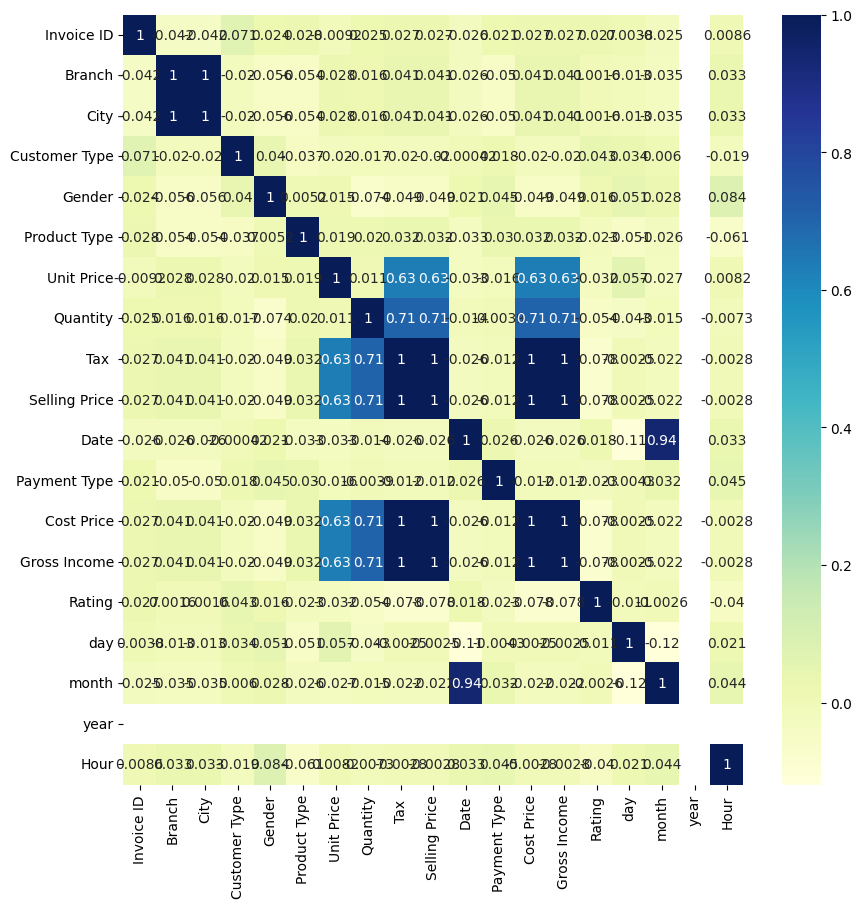

In [ ]:
#Correlation plot

plt.figure(figsize=(10,10))

#print(df_prime.corr())
sns.heatmap(df_target_fix.corr(), cmap="YlGnBu", annot=True)

In [ ]:
df_fe1 = df_target_fix.copy()

In [ ]:
drop_list = ['Invoice ID',"Branch",'Date',"Time","date","Cost Price","Tax ","Gross Income","Unit Price","Quantity","year","Hour","day"]

In [ ]:
df_fe1.drop(columns=drop_list,inplace=True)

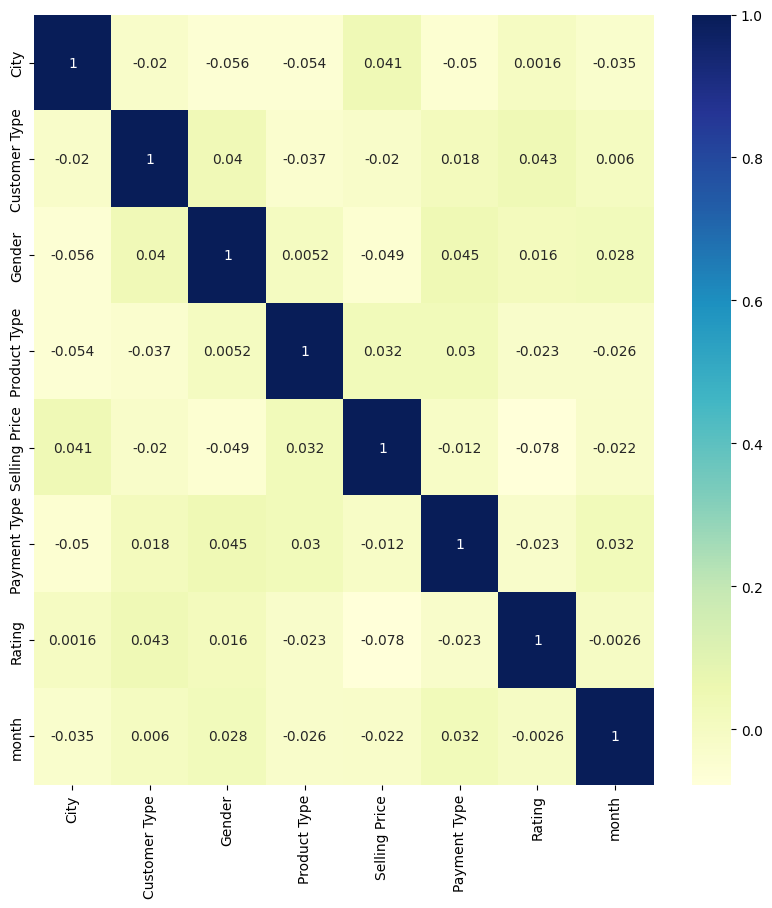

In [ ]:

#Correlation plot

plt.figure(figsize=(10,10))

#print(df_prime.corr())
sns.heatmap(df_fe1.corr(), cmap="YlGnBu", annot=True)

In [ ]:
df_fe1.head()

City  Customer Type  Gender  Product Type  Selling Price  Payment Type  \
0     0              0       0             3       548.9715             2   
1     2              1       0             0        80.2200             0   
2     0              1       1             4       340.5255             1   
3     0              0       1             3       489.0480             2   
4     0              1       1             5       634.3785             2   

   Rating  month  
0       1      1  
1       1      3  
2       1      3  
3       1      1  
4       0      2

#### Principle Component Analysis - FE1

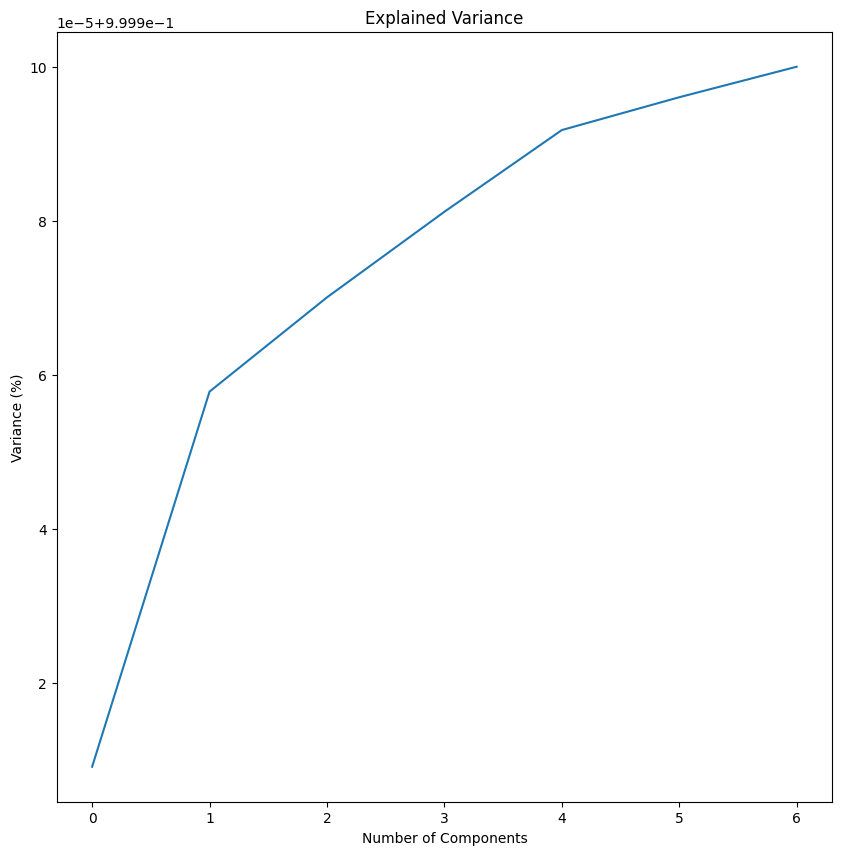

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(df_fe1.drop(columns=["Rating"]))
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()


<p>From the diagram above, it can be seen that 4 principal components explain almost 90% of the variance in data and 6 principal components explain around 95-100% of the variance in data.
<br>
So, instead of giving all the columns as input, we’d only feed these 4 principal components of the data to the machine learning algorithm and we’d obtain a similar result.</p>

In [ ]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df_fe1.drop(columns=["Rating"]))
# This will be the new data fed to the algorithm.
df_fe1_pca = pd.DataFrame(data = new_data
             , columns = ['PC1', 'PC2','PC3',"PC4"]) # ,"PC4","PC5","PC6"])
df_fe1_pca['Rating'] = list(df_fe1["Rating"])
df_fe1_pca.head()

PC1       PC2       PC3       PC4  Rating
0  226.004831  0.571895 -0.458373 -1.536212       1
1 -242.747145 -2.473990  0.488660  1.511311       1
2   17.558810  1.555964 -1.121206  0.605474       1
3  166.081233  0.587315 -0.508461 -1.552898       1
4  311.412052  2.526734 -1.136069 -0.742229       0

## Feature Engineering Way 2 - Using VIF

#### MultiCollinearlity(vif)

<b>Variance Inflation Factor</b> : A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

![image.png](attachment:b4bc7c92-0928-4cc8-9640-a120cf1d2721.png)

We need to remove the columns with high VIF score so that score of all features gets below 5
So we need to remove Feature with high VIFs and again calculate for all the rest of the columns and continue to do so until all the columns score is around 5

In [ ]:
df_fe2 = df_target_fix.copy()

In [ ]:
df_fe2.drop(columns=["Time","Date","date","Hour"],inplace=True)

In [ ]:
def vif_score(x):
    scalar = StandardScaler()
    arr = scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns = ["Features","VIF_Score"])

vif_score(df_fe2)

Features  VIF_Score
0      Invoice ID   1.012902
1          Branch        inf
2            City        inf
3   Customer Type   1.011952
4          Gender   1.016219
5    Product Type   1.011232
6      Unit Price   4.609214
7        Quantity   5.464686
8            Tax         inf
9   Selling Price        inf
10   Payment Type   1.007346
11     Cost Price        inf
12   Gross Income        inf
13         Rating   1.011631
14            day   1.027347
15          month   1.020636
16           year        NaN

In [ ]:
# droping one of the four columns that have very high multicollinearity

df_fe2.drop(columns=["Branch"],inplace=True)
vif_score(df_fe2)

Features  VIF_Score
0      Invoice ID   1.012902
1            City   1.014077
2   Customer Type   1.011952
3          Gender   1.016219
4    Product Type   1.011232
5      Unit Price   4.609214
6        Quantity   5.464686
7            Tax         inf
8   Selling Price        inf
9    Payment Type   1.007346
10     Cost Price        inf
11   Gross Income        inf
12         Rating   1.011631
13            day   1.027347
14          month   1.020636
15           year        NaN

In [ ]:
df_fe2.drop(columns=["Cost Price","year"],inplace=True)
vif_score(df_fe2)

Features  VIF_Score
0      Invoice ID   1.012902
1            City   1.014077
2   Customer Type   1.011952
3          Gender   1.016219
4    Product Type   1.011232
5      Unit Price   4.609214
6        Quantity   5.464686
7            Tax         inf
8   Selling Price        inf
9    Payment Type   1.007346
10   Gross Income        inf
11         Rating   1.011631
12            day   1.027347
13          month   1.020636

In [ ]:
df_fe2.drop(columns=['Tax '],inplace=True)
vif_score(df_fe2)

Features  VIF_Score
0      Invoice ID   1.012902
1            City   1.014077
2   Customer Type   1.011952
3          Gender   1.016219
4    Product Type   1.011232
5      Unit Price   4.609214
6        Quantity   5.464686
7   Selling Price        inf
8    Payment Type   1.007346
9    Gross Income        inf
10         Rating   1.011631
11            day   1.027347
12          month   1.020636

In [ ]:
df_fe2.drop(columns=['Gross Income'],inplace=True)
vif_score(df_fe2)

Features  VIF_Score
0      Invoice ID   1.012902
1            City   1.014077
2   Customer Type   1.011952
3          Gender   1.016219
4    Product Type   1.011232
5      Unit Price   4.609214
6        Quantity   5.464686
7   Selling Price   9.184798
8    Payment Type   1.007346
9          Rating   1.011631
10            day   1.027347
11          month   1.020636

In [ ]:
df_fe2.drop(columns=['day'],inplace=True)
vif_score(df_fe2)

Features  VIF_Score
0      Invoice ID   1.012901
1            City   1.013777
2   Customer Type   1.010902
3          Gender   1.013801
4    Product Type   1.008195
5      Unit Price   4.599975
6        Quantity   5.464675
7   Selling Price   9.180650
8    Payment Type   1.007341
9          Rating   1.011349
10          month   1.005524

In [ ]:
df_fe2.drop(columns=['Invoice ID',"Selling Price"],inplace=True)
df_fe2.head()

City  Customer Type  Gender  Product Type  Unit Price  Quantity  \
0     0              0       0             3       74.69         7   
1     2              1       0             0       15.28         5   
2     0              1       1             4       46.33         7   
3     0              0       1             3       58.22         8   
4     0              1       1             5       86.31         7   

   Payment Type  Rating  month  
0             2       1      1  
1             0       1      3  
2             1       1      3  
3             2       1      1  
4             2       0      2

<b>MultiCollinearily Exited between the Features and now it is removed</b><br>
All VIF Scores are below 10 which means there is very less correlation between the variables

<b>There is no high correlation between features and target variables</b>

#### Dealing with Target Variable (Rating)

#### Principle Component Analysis -FE2

Principal Component Analysis is an unsupervised learning algorithm that is used for the <b>dimensionality decomposition</b> in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components

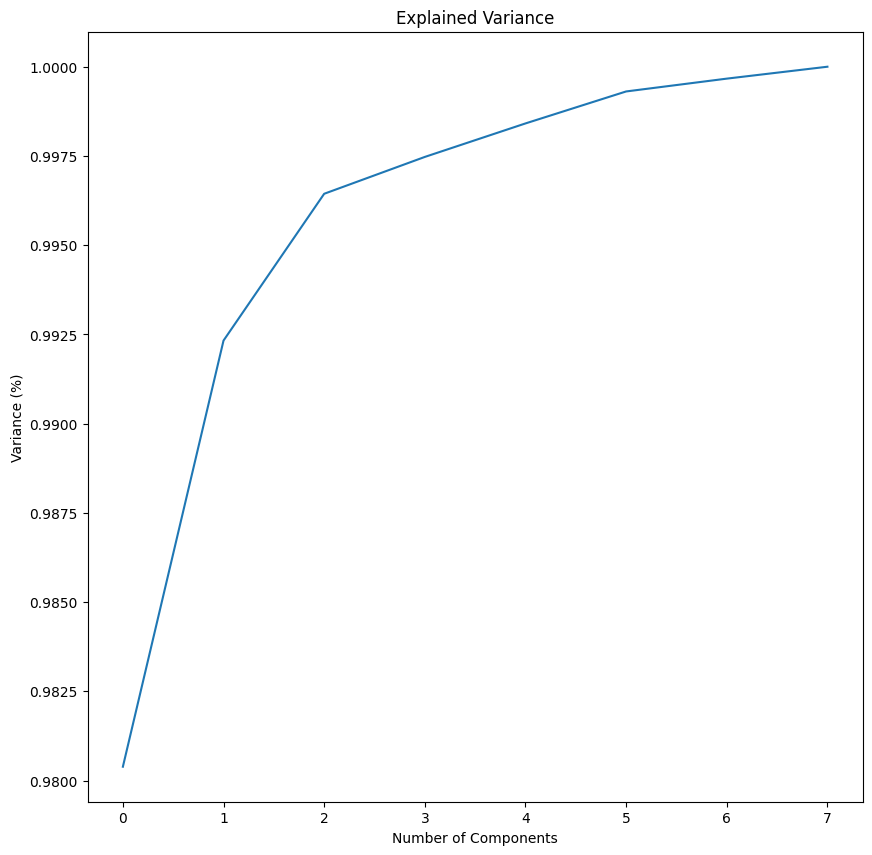

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(df_fe2.drop(columns=["Rating"]))
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

<p>From the diagram above, it can be seen that 2 principal components explain almost 99% of the variance in data.
<br>
So, instead of giving all the columns as input, we’d only feed these 2 principal components of the data to the machine learning algorithm and we’d obtain a similar result.</p>

In [ ]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(df_fe2.drop(columns=["Rating"]))
# This will be the new data fed to the algorithm.
df_fe2_pca = pd.DataFrame(data = new_data
             , columns = ['PC1', 'PC2']) # ,"PC4","PC5","PC6"])
df_fe2_pca['Rating'] = list(df_fe2["Rating"])
df_fe2_pca

PC1       PC2  Rating
0   -19.019848 -1.482824       1
1    40.395549  0.497667       1
2     9.340144 -1.511557       1
3    -2.551385 -2.489715       1
4   -30.641376 -1.483603       0
..         ...       ...     ...
995  15.325639  4.480093       1
996 -41.713420 -4.464475       0
997  23.838098  4.496051       1
998 -10.143947  4.505148       0
999 -32.667437 -1.427938       1

[1000 rows x 3 columns]

Number of columns are decreased from 11 to 7 using Principle Component Analysis(Curse of Dimensionality reduced)

## Model Building (Random Forest Classifier)

#### Split Independent and Dependent Features

#### Train Test Split
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

##### Case : 70:30
Split the data into Training and test data where 70% of the data is used for learning the model and test 30% is used for testing/validation

We selected 70:30 split as it has enough data to training, validation and testing

### Performance Evaluation

#### Confusion Matrix

 performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.
 
<br>
It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.

#### Accuracy,Precision, Recall, f1 score, 
<b>Accuracy :</b> The base metric used for model evaluation is often Accuracy, describing the number of correct predictions over all predictions<br>
<center><b>Accuracy = (TP + TN)/(TP + FP + TN + FN)</b></center>
<br>
<b>Recall</b> : Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data<br>
<center><b>Recall = TruePositives / (TruePositives + FalseNegatives)</b></center>
<br>
<b>Precision</b>  : Precision is a measure of how many of the positive predictions made are correct (true positives)<br>
<center><b>Precision = TruePositives / (TruePositives + FalsePositives)</b></center>
<br>
<b>F1 Score </b> :F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two.
<br>
<center><b>F-Measure = (2 * Precision * Recall) / (Precision + Recall)</b></center>


In [ ]:
index_matrix = ["Accuracy","Precision","Recall","F1-Score"]
matrix_df = pd.DataFrame(index = [index_matrix])

In [ ]:
col_name = {
                    "0":"FE 1",
                    "1":"FE 2",
                    "2":"FE 1 + PCA",
                    "3":"FE 2 + PCA",
                    }

In [ ]:

for i,df in enumerate([df_fe1,df_fe2,df_fe1_pca,df_fe2_pca]):
    X = df.drop(columns = ["Rating"])
    y = df["Rating"]
    x_train_c1,x_test_c1,y_train_c1,y_test_c1 = train_test_split(X,y, train_size=0.7)
    
    randomforest_model = RandomForestClassifier()

    randomforest_model.fit(x_train_c1,y_train_c1)
    y_pred_c1_rf = randomforest_model.predict(x_test_c1)
    
    print("Confusion Matrix from "+col_name[str(i)])
    print(confusion_matrix(y_test_c1,y_pred_c1_rf))
    
    matrix_c1 = [
    accuracy_score(y_test_c1,y_pred_c1_rf),
    precision_score(y_test_c1,y_pred_c1_rf,average="binary",),
    recall_score(y_test_c1,y_pred_c1_rf,average="binary"),
    f1_score(y_test_c1,y_pred_c1_rf,average="binary")
    ]

    matrix_df[col_name[str(i)]] = matrix_c1
    


Confusion Matrix from FE 1
[[ 10  72]
 [ 28 190]]
Confusion Matrix from FE 2
[[  7  76]
 [ 14 203]]
Confusion Matrix from FE 1 + PCA
[[ 13  77]
 [ 28 182]]
Confusion Matrix from FE 2 + PCA
[[ 11  86]
 [ 27 176]]


In [ ]:
matrix_df.head()

FE 1      FE 2  FE 1 + PCA  FE 2 + PCA
Accuracy   0.666667  0.700000    0.650000    0.623333
Precision  0.725191  0.727599    0.702703    0.671756
Recall     0.871560  0.935484    0.866667    0.866995
F1-Score   0.791667  0.818548    0.776119    0.756989

It can be seen that best performance has been recieved using FE2 which was feature engineering using VIF. FE2 with 0.83 as F-Score is way better than FE1 with 0.78 as F-score.
It is important to that Feature engineering was strong enough that for FE1 where in 4 features were selected as part of PCA, the performance with and without OCA is comparable. However, for FE2, post PCA only 2 features were selected which resulted in degradation of performance with PCA than without PCA.

### Feature Ranking

In [ ]:

for i,df in enumerate([df_fe1,df_fe2]):
    X = df.drop(columns = ["Rating"])
    y = df["Rating"]
    x_train_c1,x_test_c1,y_train_c1,y_test_c1 = train_test_split(X,y, train_size=0.7)
    
    randomforest_model = RandomForestClassifier()

    randomforest_model.fit(x_train_c1,y_train_c1)
    y_pred_c1_rf = randomforest_model.predict(x_test_c1)
    
    ndf = pd.DataFrame(randomforest_model.feature_importances_, columns = ['feature_importance'])
    ndf['features']=x_train_c1.columns
    print("Feature Ranking from " + col_name[str(i)])
    display(ndf.sort_values(by=['feature_importance'],ascending=False))

    


Feature Ranking from FE 1


feature_importance       features
4            0.488045  Selling Price
3            0.166015   Product Type
5            0.090932   Payment Type
0            0.087503           City
6            0.082264          month
1            0.042845  Customer Type
2            0.042395         Gender

Feature Ranking from FE 2


feature_importance       features
4            0.347363     Unit Price
5            0.190817       Quantity
3            0.142623   Product Type
0            0.080399           City
6            0.077424   Payment Type
7            0.073637          month
2            0.044111         Gender
1            0.043626  Customer Type

## Model Building (Association Rules Mining)

In [ ]:
df_assoc_base = df_root.copy()

Applying Lambda on Target Variable to make it binary classification and replacing month values with appropriate string so as to analyze association rules appropriately

In [ ]:
df_assoc_base["Rating"] = df_assoc_base["Rating"].apply(lambda x : "Good" if x >= 6.9 else "Bad")
df_assoc_base["month"] = df_assoc_base["month"].replace({1:"M1",2:"M2",3:"M3"})
df_assoc_base.head()

Invoice ID Branch       City Customer Type  Gender  \
0  750-67-8428      A  Bangalore        Member  Female   
1  226-31-3081      C     Mysore        Normal  Female   
2  631-41-3108      A  Bangalore        Normal    Male   
3  123-19-1176      A  Bangalore        Member    Male   
4  373-73-7910      A  Bangalore        Normal    Male   

             Product Type  Unit Price  Quantity     Tax   Selling Price  ...  \
0       Health and beauty       74.69         7  26.1415       548.9715  ...   
1  Electronic accessories       15.28         5   3.8200        80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155       340.5255  ...   
3       Health and beauty       58.22         8  23.2880       489.0480  ...   
4       Sports and travel       86.31         7  30.2085       634.3785  ...   

                 Time Payment Type Cost Price  Gross Income  Rating  \
0 2022-08-28 13:08:00   Debit card     522.83       26.1415    Good   
1 2022-08-28 10:29:00         Cash      76.40        3.8200    Good   
2 2022-08-28 13:23:00  Credit card     324.31       16.2155    Good   
3 2022-08-28 20:33:00   Debit card     465.76       23.2880    Good   
4 2022-08-28 10:37:00   Debit card     604.17       30.2085     Bad   

        date day  month  year  Hour  
0 2019-01-05   5     M1  2019    13  
1 2019-03-08   8     M3  2019    10  
2 2019-03-03   3     M3  2019    13  
3 2019-01-27  27     M1  2019    20  
4 2019-02-08   8     M2  2019    10  

[5 rows x 21 columns]

### Association Rules - FE 1 

Using column list as derived from FE 1 above (HeatMap and Correlation)

In [ ]:
df_assoc1 = df_assoc_base.copy()
df_assoc1 = df_assoc1[df_fe1.columns.to_list()] 
df_assoc1.head()

City Customer Type  Gender            Product Type  Selling Price  \
0  Bangalore        Member  Female       Health and beauty       548.9715   
1     Mysore        Normal  Female  Electronic accessories        80.2200   
2  Bangalore        Normal    Male      Home and lifestyle       340.5255   
3  Bangalore        Member    Male       Health and beauty       489.0480   
4  Bangalore        Normal    Male       Sports and travel       634.3785   

  Payment Type Rating month  
0   Debit card   Good    M1  
1         Cash   Good    M3  
2  Credit card   Good    M3  
3   Debit card   Good    M1  
4   Debit card    Bad    M2

In [ ]:
records = []
for i in range(0, len(df_assoc1)):
    records.append([str(df_assoc1.values[i,j]) for j in range(0, 8)])

In [ ]:
records[0]

['Bangalore',
 'Member',
 'Female',
 'Health and beauty',
 '548.9715',
 'Debit card',
 'Good',
 'M1']

In [ ]:
association_rules_fe1 = apriori(records, min_support=0.028, min_confidence=0.68, min_lift=1.2, min_length=4)
association_results_fe1 = list(association_rules_fe1)

In [ ]:
print(len(association_results_fe1))

5


In [ ]:
result_matrix = ["Rule", "Support_FE1", "Confidence_FE1", "Lift_FE1"]
perf_df1 = pd.DataFrame(columns = [result_matrix])
perf_df1

Empty DataFrame
Columns: [(Rule,), (Support_FE1,), (Confidence_FE1,), (Lift_FE1,)]
Index: []

In [ ]:
i = 0
for item in association_results_fe1:
    i+=1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    # print(item)
    items = [x for x in pair]
    rule_nm = str(item[2][0][0]).replace("frozenset(","").replace(")","") + " -> " + str(item[2][0][1]).replace("frozenset(","").replace(")","")
    print("Rule " + str(i) + " : " + rule_nm)
    
    #second index of the inner list
    support = str(item[1])
    print("Support: " + support)

    #third index of the list located at 0th
    #of the third index of the inner list

    confidence = str(item[2][0][2])
    lift = str(item[2][0][3])
    print("Confidence: " + confidence)
    print("Lift: " + lift)
    row_list = [rule_nm,support,confidence,lift]
    # print(row_list)
    perf_df1.loc[len(perf_df1.index)] = row_list
   
    print("=====================================")

Rule 1 : {'M2', 'Credit card', 'Bad'} -> {'Female'}
Support: 0.029
Confidence: 0.6904761904761905
Lift: 1.378195988974432
Rule 2 : {'Mangalore', 'M3', 'Debit card'} -> {'Bad'}
Support: 0.033
Confidence: 0.7173913043478262
Lift: 1.482213438735178
Rule 3 : {'Bangalore', 'Good', 'Credit card'} -> {'Male'}
Support: 0.04
Confidence: 0.7142857142857143
Lift: 1.43143429716576
Rule 4 : {'Female', 'Good', 'Home and lifestyle'} -> {'Member'}
Support: 0.028
Confidence: 0.6829268292682926
Lift: 1.363127403729127
Rule 5 : {'Good', 'Normal', 'Home and lifestyle'} -> {'Male'}
Support: 0.028
Confidence: 0.6829268292682926
Lift: 1.3685908402170193


In [ ]:
perf_df1.set_index('Rule',inplace=True)
perf_df1.head()

Support_FE1  \
Rule                                                             
({'M2', 'Credit card', 'Bad'} -> {'Female'},)            0.029   
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)          0.033   
({'Bangalore', 'Good', 'Credit card'} -> {'Male...        0.04   
({'Female', 'Good', 'Home and lifestyle'} -> {'...       0.028   
({'Good', 'Normal', 'Home and lifestyle'} -> {'...       0.028   

                                                        Confidence_FE1  \
Rule                                                                     
({'M2', 'Credit card', 'Bad'} -> {'Female'},)       0.6904761904761905   
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)     0.7173913043478262   
({'Bangalore', 'Good', 'Credit card'} -> {'Male...  0.7142857142857143   
({'Female', 'Good', 'Home and lifestyle'} -> {'...  0.6829268292682926   
({'Good', 'Normal', 'Home and lifestyle'} -> {'...  0.6829268292682926   

                                                              Lift_FE1  
Rule                                                                    
({'M2', 'Credit card', 'Bad'} -> {'Female'},)        1.378195988974432  
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)      1.482213438735178  
({'Bangalore', 'Good', 'Credit card'} -> {'Male...    1.43143429716576  
({'Female', 'Good', 'Home and lifestyle'} -> {'...   1.363127403729127  
({'Good', 'Normal', 'Home and lifestyle'} -> {'...  1.3685908402170193

### Association Rules - FE 2

Using Column list as derived from FE 2 above (VIF)

In [ ]:
df_assoc2 = df_assoc_base.copy()
df_assoc2 = df_assoc2[df_fe2.columns.to_list()]
df_assoc2.head()

City Customer Type  Gender            Product Type  Unit Price  \
0  Bangalore        Member  Female       Health and beauty       74.69   
1     Mysore        Normal  Female  Electronic accessories       15.28   
2  Bangalore        Normal    Male      Home and lifestyle       46.33   
3  Bangalore        Member    Male       Health and beauty       58.22   
4  Bangalore        Normal    Male       Sports and travel       86.31   

   Quantity Payment Type Rating month  
0         7   Debit card   Good    M1  
1         5         Cash   Good    M3  
2         7  Credit card   Good    M3  
3         8   Debit card   Good    M1  
4         7   Debit card    Bad    M2

In [ ]:
records = []
for i in range(0, len(df_assoc2)):
    records.append([str(df_assoc2.values[i,j]) for j in range(0, 9)])

In [ ]:
records[0]

['Bangalore',
 'Member',
 'Female',
 'Health and beauty',
 '74.69',
 '7',
 'Debit card',
 'Good',
 'M1']

In [ ]:
association_rules_fe2 = apriori(records, min_support=0.028, min_confidence=0.68, min_lift=1.2, min_length=1)
association_results_fe2 = list(association_rules_fe2)

In [ ]:
print(len(association_results_fe2))

5


In [ ]:
result_matrix2 = ["Rule", "Support_FE2", "Confidence_FE2", "Lift_FE2"]
perf_df2 = pd.DataFrame(columns = [result_matrix2])
perf_df2

Empty DataFrame
Columns: [(Rule,), (Support_FE2,), (Confidence_FE2,), (Lift_FE2,)]
Index: []

In [ ]:
i = 0
for item in association_results_fe2:
    i+=1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    # print(item)
    items = [x for x in pair]
    rule_nm = str(item[2][0][0]).replace("frozenset(","").replace(")","") + " -> " + str(item[2][0][1]).replace("frozenset(","").replace(")","")
    print("Rule " + str(i) + " : " + rule_nm)
    
    #second index of the inner list
    support = str(item[1])
    print("Support: " + support)

    #third index of the list located at 0th
    #of the third index of the inner list

    confidence = str(item[2][0][2])
    lift = str(item[2][0][3])
    print("Confidence: " + confidence)
    print("Lift: " + lift)
    row_list = [rule_nm,support,confidence,lift]
    print(row_list)
    #(pd.DataFrame([row_list],columns=['Rule', 'Support', 'Confidence', 'Lift']),ignore_index=True)
    perf_df2.loc[len(perf_df2.index)] = row_list
   
    print("=====================================")

Rule 1 : {'M2', 'Credit card', 'Bad'} -> {'Female'}
Support: 0.029
Confidence: 0.6904761904761905
Lift: 1.378195988974432
["{'M2', 'Credit card', 'Bad'} -> {'Female'}", '0.029', '0.6904761904761905', '1.378195988974432']
Rule 2 : {'Mangalore', 'M3', 'Debit card'} -> {'Bad'}
Support: 0.033
Confidence: 0.7173913043478262
Lift: 1.482213438735178
["{'Mangalore', 'M3', 'Debit card'} -> {'Bad'}", '0.033', '0.7173913043478262', '1.482213438735178']
Rule 3 : {'Bangalore', 'Good', 'Credit card'} -> {'Male'}
Support: 0.04
Confidence: 0.7142857142857143
Lift: 1.43143429716576
["{'Bangalore', 'Good', 'Credit card'} -> {'Male'}", '0.04', '0.7142857142857143', '1.43143429716576']
Rule 4 : {'Female', 'Good', 'Home and lifestyle'} -> {'Member'}
Support: 0.028
Confidence: 0.6829268292682926
Lift: 1.363127403729127
["{'Female', 'Good', 'Home and lifestyle'} -> {'Member'}", '0.028', '0.6829268292682926', '1.363127403729127']
Rule 5 : {'Good', 'Normal', 'Home and lifestyle'} -> {'Male'}
Support: 0.028
Con

In [ ]:
perf_df2.set_index('Rule',inplace=True)
perf_df2.head()

Support_FE2  \
Rule                                                             
({'M2', 'Credit card', 'Bad'} -> {'Female'},)            0.029   
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)          0.033   
({'Bangalore', 'Good', 'Credit card'} -> {'Male...        0.04   
({'Female', 'Good', 'Home and lifestyle'} -> {'...       0.028   
({'Good', 'Normal', 'Home and lifestyle'} -> {'...       0.028   

                                                        Confidence_FE2  \
Rule                                                                     
({'M2', 'Credit card', 'Bad'} -> {'Female'},)       0.6904761904761905   
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)     0.7173913043478262   
({'Bangalore', 'Good', 'Credit card'} -> {'Male...  0.7142857142857143   
({'Female', 'Good', 'Home and lifestyle'} -> {'...  0.6829268292682926   
({'Good', 'Normal', 'Home and lifestyle'} -> {'...  0.6829268292682926   

                                                              Lift_FE2  
Rule                                                                    
({'M2', 'Credit card', 'Bad'} -> {'Female'},)        1.378195988974432  
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)      1.482213438735178  
({'Bangalore', 'Good', 'Credit card'} -> {'Male...    1.43143429716576  
({'Female', 'Good', 'Home and lifestyle'} -> {'...   1.363127403729127  
({'Good', 'Normal', 'Home and lifestyle'} -> {'...  1.3685908402170193

### Comparison of Association Rules

In [ ]:
df_compare = pd.concat([perf_df1,perf_df2],axis = 1)

In [ ]:
df_compare

Support_FE1  \
Rule                                                             
({'M2', 'Credit card', 'Bad'} -> {'Female'},)            0.029   
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)          0.033   
({'Bangalore', 'Good', 'Credit card'} -> {'Male...        0.04   
({'Female', 'Good', 'Home and lifestyle'} -> {'...       0.028   
({'Good', 'Normal', 'Home and lifestyle'} -> {'...       0.028   

                                                        Confidence_FE1  \
Rule                                                                     
({'M2', 'Credit card', 'Bad'} -> {'Female'},)       0.6904761904761905   
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)     0.7173913043478262   
({'Bangalore', 'Good', 'Credit card'} -> {'Male...  0.7142857142857143   
({'Female', 'Good', 'Home and lifestyle'} -> {'...  0.6829268292682926   
({'Good', 'Normal', 'Home and lifestyle'} -> {'...  0.6829268292682926   

                                                              Lift_FE1  \
Rule                                                                     
({'M2', 'Credit card', 'Bad'} -> {'Female'},)        1.378195988974432   
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)      1.482213438735178   
({'Bangalore', 'Good', 'Credit card'} -> {'Male...    1.43143429716576   
({'Female', 'Good', 'Home and lifestyle'} -> {'...   1.363127403729127   
({'Good', 'Normal', 'Home and lifestyle'} -> {'...  1.3685908402170193   

                                                   Support_FE2  \
Rule                                                             
({'M2', 'Credit card', 'Bad'} -> {'Female'},)            0.029   
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)          0.033   
({'Bangalore', 'Good', 'Credit card'} -> {'Male...        0.04   
({'Female', 'Good', 'Home and lifestyle'} -> {'...       0.028   
({'Good', 'Normal', 'Home and lifestyle'} -> {'...       0.028   

                                                        Confidence_FE2  \
Rule                                                                     
({'M2', 'Credit card', 'Bad'} -> {'Female'},)       0.6904761904761905   
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)     0.7173913043478262   
({'Bangalore', 'Good', 'Credit card'} -> {'Male...  0.7142857142857143   
({'Female', 'Good', 'Home and lifestyle'} -> {'...  0.6829268292682926   
({'Good', 'Normal', 'Home and lifestyle'} -> {'...  0.6829268292682926   

                                                              Lift_FE2  
Rule                                                                    
({'M2', 'Credit card', 'Bad'} -> {'Female'},)        1.378195988974432  
({'Mangalore', 'M3', 'Debit card'} -> {'Bad'},)      1.482213438735178  
({'Bangalore', 'Good', 'Credit card'} -> {'Male...    1.43143429716576  
({'Female', 'Good', 'Home and lifestyle'} -> {'...   1.363127403729127  
({'Good', 'Normal', 'Home and lifestyle'} -> {'...  1.3685908402170193

Datasets with features as per FE1 and FE2 were shared as input to association rules with minimum values for support, confidence, lift and length as 0.0028,.0.68,1.2,4 respectively. It can be observed that both datasets retrieved similar rules with similar values for confidence, support, lift.

## Conclusion
Evaluation metrics for Random Forest Classifier and Association Rules Mining are way different and cannot be compared but independently analyzing them and comparing the results, it can be said that FE2 is a better way to approach supermarket analysis.